In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"

import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from scipy.stats import norm

import keras
from keras.datasets import mnist
from keras.layers import Input, Reshape, Conv1D, Conv1DTranspose,  Flatten, Dense, Lambda, MaxPooling1D, BatchNormalization, Dropout, Activation, UpSampling1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping


from tensorflow import keras
#from tensorflow.keras import datasets, layers, models
#from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv1D, MaxPooling1D, BatchNormalization
#from tensorflow.keras.models import Sequential 

from keras.models import Model
from keras import metrics
from keras import backend as K   # 'generic' backend so code works with either tensorflow or theano

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


K.clear_session()
#np.random.seed(237)

In [3]:
train_X = pd.read_csv('Chrome/trainX_100_US_Chrome.csv', header=None)
train_Y = pd.read_csv('Chrome/trainY_100_US_Chrome.csv', header=None)

In [4]:
trainX = train_X.to_numpy()
trainY = train_Y.to_numpy()
#trainY_test = train_Y.to_numpy()

In [5]:
print(trainX.shape)

(10000, 6000)


In [6]:
print(trainY)

type(trainY[0])

[[ 0]
 [ 0]
 [ 0]
 ...
 [99]
 [99]
 [99]]


numpy.ndarray

# Shuffled 

In [7]:
websites_test = [trainX[i:i + 100] for i in range(0, len(trainX), 100)]
websites_test=np.asarray(websites_test)


In [8]:
websites_test[0][0:5]
#websites_test[99].shape

array([[12.5       ,  5.        , 14.        , ...,  2.80000001,
         3.        ,  3.19999999],
       [16.39999998,  5.        ,  5.        , ...,  3.39999998,
         2.69999999,  2.89999998],
       [13.19999999,  5.        , 13.19999999, ...,  3.09999996,
         3.        ,  3.09999996],
       [13.19999999,  5.        , 11.60000002, ...,  3.29999995,
         3.59999996,  3.69999999],
       [15.40000004,  5.        ,  5.        , ...,  3.10000002,
         2.90000004,  2.90000004]])

In [9]:
web_num =0

for web_num in range (0,100):
       np.random.shuffle(websites_test[web_num])
#random.shuffle(websites_test[0])
    

In [10]:
#np.random.shuffle(websites_test)

In [11]:
websites_test[0][0:5]


array([[ 9.80000001, 10.        ,  5.        , ...,  2.89999998,
         3.        ,  2.89999998],
       [14.80000001,  5.        ,  5.        , ...,  2.69999999,
         3.        ,  3.19999999],
       [11.19999999,  5.        , 10.19999999, ...,  2.80000001,
         2.89999998,  3.39999998],
       [16.09999996,  5.        ,  5.        , ...,  3.19999999,
         3.19999999,  3.39999998],
       [12.69999999,  5.        , 14.40000004, ...,  3.        ,
         2.89999998,  3.29999995]])

In [12]:
websites_test[0]

array([[ 9.80000001, 10.        ,  5.        , ...,  2.89999998,
         3.        ,  2.89999998],
       [14.80000001,  5.        ,  5.        , ...,  2.69999999,
         3.        ,  3.19999999],
       [11.19999999,  5.        , 10.19999999, ...,  2.80000001,
         2.89999998,  3.39999998],
       ...,
       [12.90000004,  5.        , 12.10000002, ...,  3.30000001,
         3.        ,  3.10000002],
       [13.60000002,  5.        , 13.10000002, ...,  3.20000005,
         3.10000002,  3.40000004],
       [12.39999998,  5.        , 10.30000001, ...,  3.19999999,
         3.19999999,  3.5       ]])

In [13]:
print(websites_test)

[[[ 9.80000001 10.          5.         ...  2.89999998  3.
    2.89999998]
  [14.80000001  5.          5.         ...  2.69999999  3.
    3.19999999]
  [11.19999999  5.         10.19999999 ...  2.80000001  2.89999998
    3.39999998]
  ...
  [12.90000004  5.         12.10000002 ...  3.30000001  3.
    3.10000002]
  [13.60000002  5.         13.10000002 ...  3.20000005  3.10000002
    3.40000004]
  [12.39999998  5.         10.30000001 ...  3.19999999  3.19999999
    3.5       ]]

 [[ 9.9         5.          9.9        ...  8.1         9.2
    5.        ]
  [11.8         5.         10.4        ...  5.          8.7
    5.        ]
  [ 9.8        10.          5.         ...  5.         11.1
    5.        ]
  ...
  [12.1         5.         10.3        ...  5.         11.7
    5.        ]
  [12.1         5.         10.         ... 10.5         5.
    7.6       ]
  [12.1         5.         10.4        ...  5.          8.9
    5.        ]]

 [[13.2         5.         12.2        ...  2.9        

In [14]:
websites_shuffled=np.reshape(websites_test,(10000,6000))

In [15]:

#with open('Shuffled_Train.csv', 'w', newline='') as file:
#    mywriter = csv.writer(file, delimiter=',')
#    mywriter.writerows(websites_shuffled)

In [16]:
print(websites_shuffled-trainX)

[[-2.69999999e+00  5.00000000e+00 -9.00000000e+00 ...  9.99999642e-02
   0.00000000e+00 -3.00000012e-01]
 [-1.59999996e+00  0.00000000e+00  0.00000000e+00 ... -6.99999988e-01
   3.00000012e-01  3.00000012e-01]
 [-2.00000000e+00  0.00000000e+00 -3.00000000e+00 ... -2.99999952e-01
  -1.00000024e-01  3.00000012e-01]
 ...
 [-1.30000001e+00  5.00000000e+00 -5.10000002e+00 ... -1.00000024e-01
  -3.00000012e-01 -1.00000000e+00]
 [-1.39999998e+00  0.00000000e+00 -5.00000000e-01 ... -1.00000024e-01
  -9.99999642e-02 -1.99999988e-01]
 [ 2.19999993e+00  0.00000000e+00  5.96046430e-08 ... -1.00000024e-01
  -6.00000024e-01 -3.00000012e-01]]


In [17]:
trainX = np.expand_dims(trainX,axis=2)

In [18]:
print(trainX.shape, trainY.shape)
print(train_X.shape)

(10000, 6000, 1) (10000, 1)
(10000, 6000)


In [19]:
websites_shuffled = np.expand_dims(websites_shuffled,axis=2)

In [20]:
print(websites_shuffled, websites_shuffled.shape)


[[[ 9.80000001]
  [10.        ]
  [ 5.        ]
  ...
  [ 2.89999998]
  [ 3.        ]
  [ 2.89999998]]

 [[14.80000001]
  [ 5.        ]
  [ 5.        ]
  ...
  [ 2.69999999]
  [ 3.        ]
  [ 3.19999999]]

 [[11.19999999]
  [ 5.        ]
  [10.19999999]
  ...
  [ 2.80000001]
  [ 2.89999998]
  [ 3.39999998]]

 ...

 [[ 9.89999998]
  [10.        ]
  [ 5.        ]
  ...
  [ 2.89999998]
  [ 2.80000001]
  [ 3.        ]]

 [[10.10000002]
  [ 5.        ]
  [ 9.69999999]
  ...
  [ 2.89999998]
  [ 2.80000001]
  [ 3.        ]]

 [[12.29999995]
  [ 5.        ]
  [10.20000005]
  ...
  [ 2.79999995]
  [ 2.69999999]
  [ 2.69999999]]] (10000, 6000, 1)


In [21]:
'''
minimum = np.amin(trainX)
maximum = np.amax(trainX)

trainX_normalized = (trainX-minimum)/(maximum-minimum)
#trainX_normalized = trainX

print(trainX_normalized.shape)

trainX_tensor =  tf.convert_to_tensor(trainX_normalized)
output = tf.nn.max_pool1d(trainX_tensor, 2, 2, padding='VALID')
pooled_dataset = output.numpy()
print(pooled_dataset.shape)

trainX_test = pooled_dataset
'''

"\nminimum = np.amin(trainX)\nmaximum = np.amax(trainX)\n\ntrainX_normalized = (trainX-minimum)/(maximum-minimum)\n#trainX_normalized = trainX\n\nprint(trainX_normalized.shape)\n\ntrainX_tensor =  tf.convert_to_tensor(trainX_normalized)\noutput = tf.nn.max_pool1d(trainX_tensor, 2, 2, padding='VALID')\npooled_dataset = output.numpy()\nprint(pooled_dataset.shape)\n\ntrainX_test = pooled_dataset\n"

# Normalized

In [22]:

minimum = np.amin(trainX)
maximum = np.amax(trainX)

trainX_normalized = (trainX-minimum)/(maximum-minimum)
#trainX_normalized = trainX

print(trainX_normalized.shape)



trainX_test = trainX_normalized


(10000, 6000, 1)


In [23]:
print(trainX_test.max(),trainX_test.min())

1.0 0.0


In [24]:

minimum_s = np.amin(websites_shuffled)
maximum_s = np.amax(websites_shuffled)

Shuffled_train_normalized = (websites_shuffled-minimum_s)/(maximum_s-minimum_s)
#trainX_normalized = trainX

print(Shuffled_train_normalized.shape)



trainX_Shuffled = Shuffled_train_normalized


(10000, 6000, 1)


In [25]:
print(trainX_Shuffled.max(),trainX_Shuffled.min())

1.0 0.0


In [26]:
print(trainX_test)

[[[0.24200913]
  [0.07077626]
  [0.27625571]
  ...
  [0.02054795]
  [0.02511416]
  [0.02968037]]

 [[0.33105023]
  [0.07077626]
  [0.07077626]
  ...
  [0.03424657]
  [0.01826484]
  [0.02283105]]

 [[0.25799087]
  [0.07077626]
  [0.25799087]
  ...
  [0.02739726]
  [0.02511416]
  [0.02739726]]

 ...

 [[0.21232877]
  [0.07077626]
  [0.18721461]
  ...
  [0.02511416]
  [0.02739726]
  [0.04794521]]

 [[0.21917808]
  [0.07077626]
  [0.18949772]
  ...
  [0.02511416]
  [0.02283105]
  [0.02968037]]

 [[0.18721461]
  [0.07077626]
  [0.18949772]
  ...
  [0.02283105]
  [0.03196347]
  [0.02511416]]]


In [27]:
'''
# I don't think we need it 

X_train, X_valid, y_train, y_valid = train_test_split(trainX_test, trainY ,test_size=0.2)

print("--------------Data--------------")
print("Orignal X shape: {}".format(trainX.shape))
print("Origianl Y shape: {}".format(trainY.shape))

print("--------------Train Data--------------")
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("--------------Validation Data--------------")
print("X_val shape: {}".format(X_valid.shape))
print("y_val shape: {}".format(y_valid.shape))
'''

'\n# I don\'t think we need it \n\nX_train, X_valid, y_train, y_valid = train_test_split(trainX_test, trainY ,test_size=0.2)\n\nprint("--------------Data--------------")\nprint("Orignal X shape: {}".format(trainX.shape))\nprint("Origianl Y shape: {}".format(trainY.shape))\n\nprint("--------------Train Data--------------")\nprint("X_train shape: {}".format(X_train.shape))\nprint("y_train shape: {}".format(y_train.shape))\n\nprint("--------------Validation Data--------------")\nprint("X_val shape: {}".format(X_valid.shape))\nprint("y_val shape: {}".format(y_valid.shape))\n'

In [28]:
print(trainX_test[0:2,:])
print(trainY[0:10000,0])

[[[0.24200913]
  [0.07077626]
  [0.27625571]
  ...
  [0.02054795]
  [0.02511416]
  [0.02968037]]

 [[0.33105023]
  [0.07077626]
  [0.07077626]
  ...
  [0.03424657]
  [0.01826484]
  [0.02283105]]]
[ 0  0  0 ... 99 99 99]


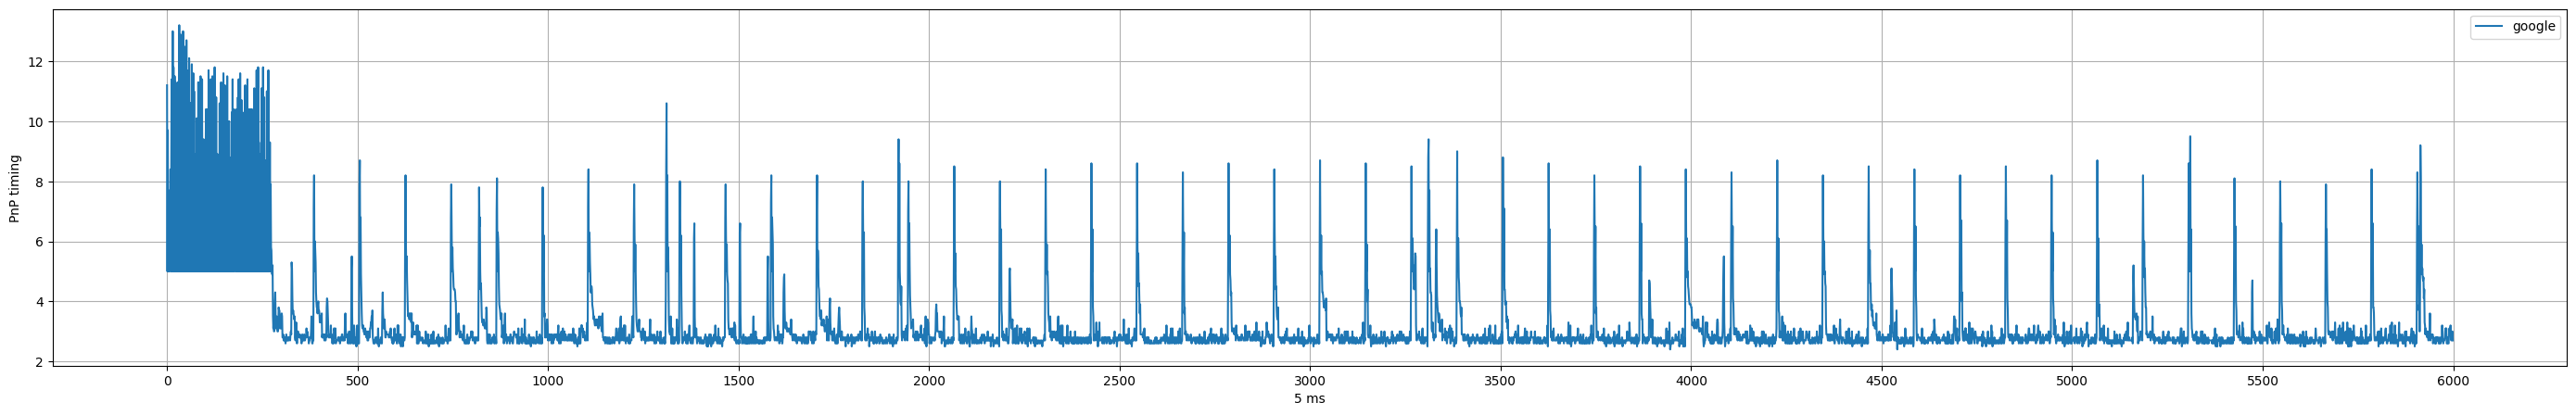

In [29]:
fig = plt.figure(figsize=(35,5))

'''
for i in range (0,2):
  plt.plot(trainX_test[i],label=i)
'''
websites_name = ['360', '9gag', 'abs-cbn', 'adobe', 'airbnb', 'aliexpress', 'allegro', 'amazon', 'apple', 'archive',
                 'baidu', 'bbc', 'bing', 'booking', 'bukalapak', 'canva', 'chase', 'craigslist','csdn', 'dailymail',
                 'dailymotion', 'digikala', 'discord', 'dropbox', 'ebay', 'espn', 'espncricinfo', 'etsy', 'exoclick', 'flipkart',
                 'force', 'foxnews', 'github', 'globo', 'godaddy', 'goodreads', 'google', 'healthline', 'hulu', 'ikea',
                 'imdb', 'imgur', 'indeed','intuit', 'jd', 'kompas', 'linkedin', 'liputan6', 'live', 'mail',
                 'mediafire', 'medium', 'mozila', 'msn', 'naver', 'netflix', 'nih', 'nordstrom', 'office', 'okezone',
                 'oracle','paypal', 'pinterest', 'popads', 'qq', 'quora', 'reddit', 'researchgate', 'scribd','slideshare',
                 'sohu', 'soundcloud', 'spotify', 'stackexchange', 'stackoverflow','steamcommunity', 'steampowered', 'taobao', 'theguardian', 'thesaurus',
                 'tistory', 'tmall', 'tribunnews', 'tripadvisor', 'tumblr', 'twitch', 'vimeo', 'walmart', 'weather','weibo',
                 'wellsfargo', 'wikipedia', 'yahoo', 'yandex', 'yelp', 'youtube', 'yy', 'zhanqi', 'zillow', 'zoom']



num_websites = 100

plt.plot(trainX[3600],label= websites_name[36])
'''
for i in range (0,num_websites):
    plt.plot(trainX[0+100*i],label=websites_name[i])

'''
plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 6500, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('Google_Original.jpeg')
plt.show()

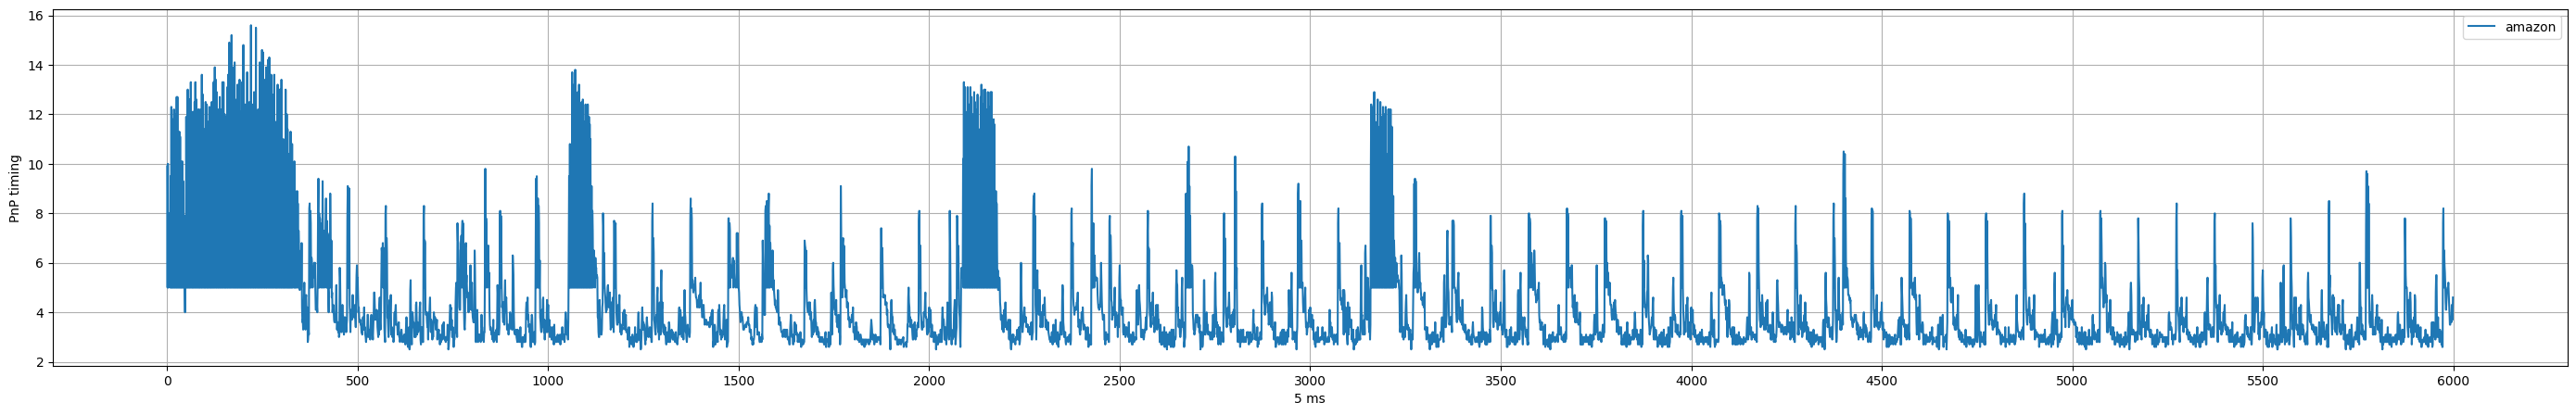

In [33]:
fig = plt.figure(figsize=(35,5))

'''
for i in range (0,2):
  plt.plot(trainX_test[i],label=i)
'''
websites_name = ['360', '9gag', 'abs-cbn', 'adobe', 'airbnb', 'aliexpress', 'allegro', 'amazon', 'apple', 'archive',
                 'baidu', 'bbc', 'bing', 'booking', 'bukalapak', 'canva', 'chase', 'craigslist','csdn', 'dailymail',
                 'dailymotion', 'digikala', 'discord', 'dropbox', 'ebay', 'espn', 'espncricinfo', 'etsy', 'exoclick', 'flipkart',
                 'force', 'foxnews', 'github', 'globo', 'godaddy', 'goodreads', 'google', 'healthline', 'hulu', 'ikea',
                 'imdb', 'imgur', 'indeed','intuit', 'jd', 'kompas', 'linkedin', 'liputan6', 'live', 'mail',
                 'mediafire', 'medium', 'mozila', 'msn', 'naver', 'netflix', 'nih', 'nordstrom', 'office', 'okezone',
                 'oracle','paypal', 'pinterest', 'popads', 'qq', 'quora', 'reddit', 'researchgate', 'scribd','slideshare',
                 'sohu', 'soundcloud', 'spotify', 'stackexchange', 'stackoverflow','steamcommunity', 'steampowered', 'taobao', 'theguardian', 'thesaurus',
                 'tistory', 'tmall', 'tribunnews', 'tripadvisor', 'tumblr', 'twitch', 'vimeo', 'walmart', 'weather','weibo',
                 'wellsfargo', 'wikipedia', 'yahoo', 'yandex', 'yelp', 'youtube', 'yy', 'zhanqi', 'zillow', 'zoom']



num_websites = 100

plt.plot(trainX[700],label= websites_name[7])
'''
for i in range (0,num_websites):
    plt.plot(trainX[0+100*i],label=websites_name[i])

'''
plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 6500, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('Google_Original.jpeg')
plt.show()

Text(0, 0.5, 'PnP timing')

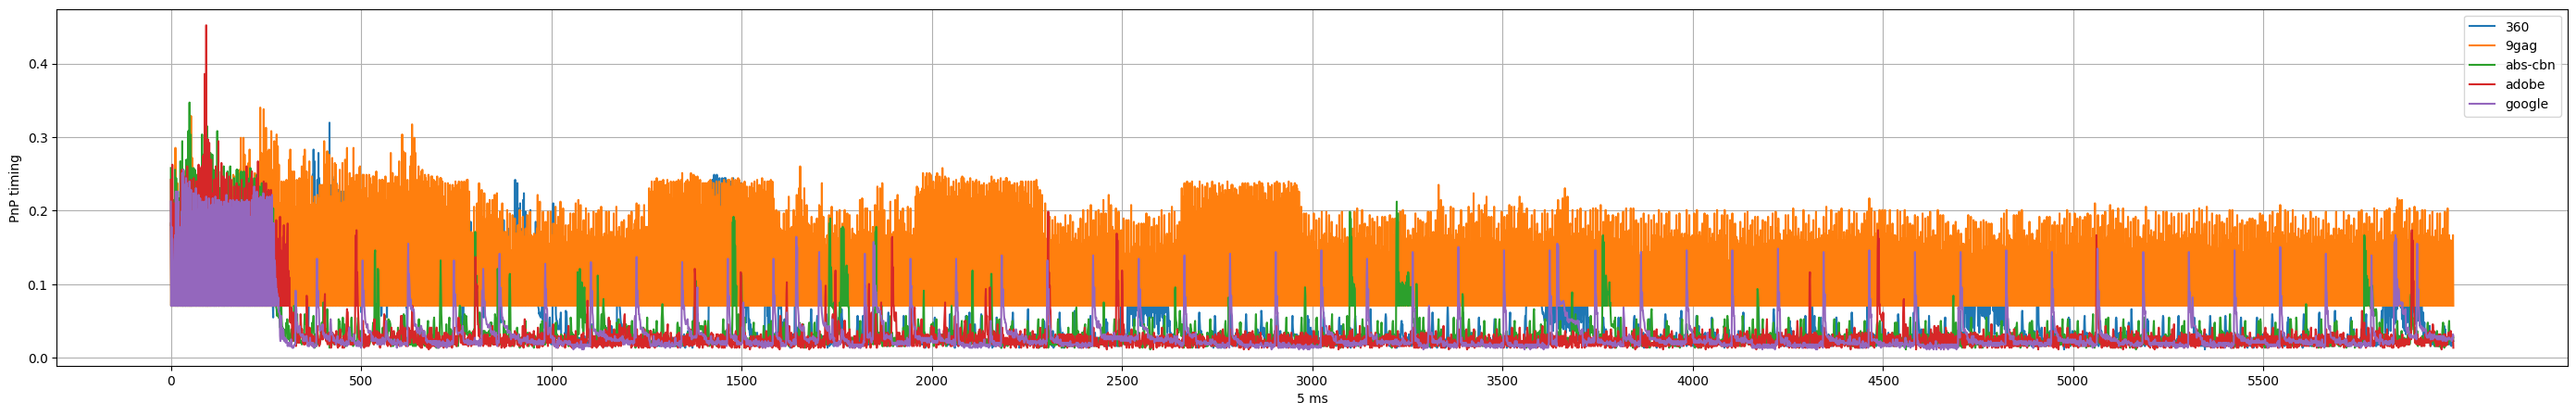

In [34]:
fig = plt.figure(figsize=(35,5))

'''
for i in range (0,2):
  plt.plot(trainX_test[i],label=i)
'''


plt.plot(trainX_Shuffled[0],label='360')
plt.plot(trainX_Shuffled[100],label='9gag')
plt.plot(trainX_Shuffled[200],label='abs-cbn')
plt.plot(trainX_Shuffled[307],label='adobe')
plt.plot(trainX_Shuffled[3600],label='google')

plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 6000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('Graph_Amaozon_Google.png')
#plt.show()

In [35]:
print(trainX_test[3])
print(trainX_Shuffled[3])

[[0.25799087]
 [0.07077626]
 [0.22146119]
 ...
 [0.03196347]
 [0.03881278]
 [0.04109589]]
[[0.32420091]
 [0.07077626]
 [0.07077626]
 ...
 [0.02968037]
 [0.02968037]
 [0.03424657]]


In [36]:
# encoding dimension; i.e. dimensionality of the latent space
latent_dim = 2

In [37]:
# sampling function
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mu + K.exp(z_log_sigma) * epsilon



In [38]:
#img_shape = (28, 28, 1)    # for MNIST
inputs_shape = (6000,1)

# Encoder architecture: Input -> Conv1D*4 -> Flatten -> Dense

encoder_inputs = Input(shape=inputs_shape)


#x = layers.Conv1D(64, 1, activation="relu", padding="same")(encoder_inputs)
#x = layers.Conv1D(32, 1, activation="relu", padding="same")(x)



x = layers.Conv1D(32, 3, activation="relu", padding="same")(encoder_inputs)
x = layers.Conv1D(64, 3, activation="relu", padding="same")(x)
#x = MaxPooling1D(pool_size=4)(x)

x = layers.Conv1D(128, 3, activation="relu", padding="same")(x)
#x = MaxPooling1D(pool_size=4)(x)
  






shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
#x = layers.Dense(16, activation="relu")(x)

z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)


print(z_mean.shape, z_log_var.shape)
#z = Sampling()([z_mean, z_log_var])

# sample vector from the latent distribution
z = Lambda(sampling)([z_mean, z_log_var])


encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

(None, 2) (None, 2)
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 6000, 1)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 6000, 32)             128       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 6000, 64)             6208      ['conv1d[0][0]']              
                                                                                                  
 conv1d_2 (Conv1D)           (None, 6000, 128)            24704     ['conv1d_1[0][0]']            
                                                                        

In [39]:
# decoder takes the latent distribution sample as input
print(K.int_shape(z)[1:])
decoder_input = Input(K.int_shape(z)[1:])
#decoder_input = Input(shape=(latent_dim,))

x = Dense(np.prod(shape_before_flattening[1:]), activation="relu")(decoder_input)

# reshape
x = Reshape(shape_before_flattening[1:])(x)
print(x.shape)
# use Conv1DTranspose to reverse the conv layers from the encoder

'''
x = Conv1DTranspose(32, 8, padding='same', activation='relu',strides =2)(x)
x = Conv1DTranspose(64, 8, padding='same', activation='relu',strides =3)(x)
x = Conv1DTranspose(128, 16, padding='same', activation='relu', strides=2)(x)
x = Conv1DTranspose(256, 16, padding='same', activation='relu', strides=2)(x)
'''
x = Conv1DTranspose(128, 3, padding='same', activation='relu')(x)
#x = UpSampling1D(size=4)(x)
x = Conv1DTranspose(64, 3, padding='same', activation='relu')(x)
#x = UpSampling1D(size=4)(x)
x = Conv1DTranspose(32, 3, padding='same', activation='relu')(x)

x = Conv1D(1, 1, padding='same', activation='sigmoid')(x)


#Original
#x = Conv1DTranspose(64, 1, padding='same', activation='relu')(x)
#x = Conv1D(1, 1, padding='same', activation='sigmoid')(x)

# decoder model statement
decoder = Model(decoder_input, x)
z_decoder = decoder(z)
decoder.summary()

(2,)
(None, 6000, 128)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 768000)            2304000   
                                                                 
 reshape (Reshape)           (None, 6000, 128)         0         
                                                                 
 conv1d_transpose (Conv1DTr  (None, 6000, 128)         49280     
 anspose)                                                        
                                                                 
 conv1d_transpose_1 (Conv1D  (None, 6000, 64)          24640     
 Transpose)                                                      
                                                                 
 conv1d_transpose_2 (Conv1D  (None, 60

In [40]:

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.binary_crossentropy(data, reconstruction), axis =(1))
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=0))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [43]:
#batchSize = 32

In [45]:
vae = VAE(encoder, decoder)
print(vae)
vae.compile(optimizer=keras.optimizers.Adam())

#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

early_stopping = EarlyStopping(monitor='reconstruction_loss', min_delta=0, patience=10, verbose=5, mode='auto')
###########
#print(X_train.shape)
print(trainX_test.shape)
print(trainX_Shuffled.shape)
###########
#vae.fit(trainX, epochs=30, batch_size=128)
#vae.fit(trainX_test, epochs=300, batch_size=batchSize, callbacks=[early_stopping])
#vae.fit(trainX_test, epochs=300, batch_size=batchSize, callbacks=[early_stopping])
vae.fit(trainX_Shuffled, epochs=100)
#vae.fit(trainX_Shuffled, epochs=100, batch_size=batchSize)

(10000, 6000, 1)
(10000, 6000, 1)
Epoch 1/100
313/313 [==============================] - 153s 484ms/step - loss: 1400.7432 - reconstruction_loss: 1383.3447 - kl_loss: 10.6599
Epoch 2/100
313/313 [==============================] - 145s 462ms/step - loss: 1400.6538 - reconstruction_loss: 1383.1544 - kl_loss: 10.5595
Epoch 3/100
313/313 [==============================] - 141s 449ms/step - loss: 1392.2116 - reconstruction_loss: 1382.4153 - kl_loss: 10.4768
Epoch 4/100
313/313 [==============================] - 143s 456ms/step - loss: 1395.4789 - reconstruction_loss: 1382.6345 - kl_loss: 10.5552
Epoch 5/100
309/313 [============================>.] - ETA: 1s - loss: 1399.6840 - reconstruction_loss: 1382.6932 - kl_loss: 10.4617

KeyboardInterrupt: 

# Model Save and Load

## Model save

In [47]:
#encoder.save("VAE_encoder_100_6000_100D_Sep27_NewLayers_FF.h5") 
#decoder.save("VAE_decoder_100_6000_100D_Sep27_NewLayser_FF.h5") 




#VAE.save("/Research/WebsiteFingerPrinting/Generated_Data_100/VAE_100D_Aug30.h5")


vae.encoder.save('VAE_encoder_100_6000_100D_Sep28_NewLayser_FF.h5')
vae.decoder.save('VAE_decoder_100_6000_100D_Sep28_NewLayser_FF.h5')

## Model Load

In [40]:
#encoder = tf.keras.models.load_model('VAE_encoder_100_6000_100D_Sep27_NewLayers_FF.h5')
#decoder = tf.keras.models.load_model('VAE_decoder_100_6000_100D_Sep27_NewLayser_FF.h5')

In [48]:
# Translate into the latent space
encoder = Model(encoder_inputs, z_mean)

print("-----")
print(z_mean.shape)
#print(z_mean)

#with tf1.Session() as sess:  print(z_mean) 


print("-----")
print(encoder_inputs.shape)
print(trainX_test.shape)

-----
(None, 100)
-----
(None, 6000, 1)
(10000, 6000, 1)


-----
(10000, 100)
[[ 0.94025606  0.22328644 -0.45248228 ... -0.40186945 -1.6084778
   1.2555076 ]
 [-0.06688246  0.42653883 -0.8867839  ... -0.5677187  -1.747788
   1.4517668 ]
 [ 0.9018446   0.22048123 -0.48859912 ...  0.4035381  -1.0136051
  -0.47274297]
 ...
 [ 0.59969485 -0.12946506 -0.06399047 ... -0.6362601   1.8618832
  -0.47393888]
 [ 0.41741985  0.6741421  -1.1904409  ... -1.1894876   0.78841233
   0.11820607]
 [-0.311336   -0.08233233 -0.54139596 ...  0.5799251   2.3585515
   1.3300993 ]]
-----
(10000, 1)


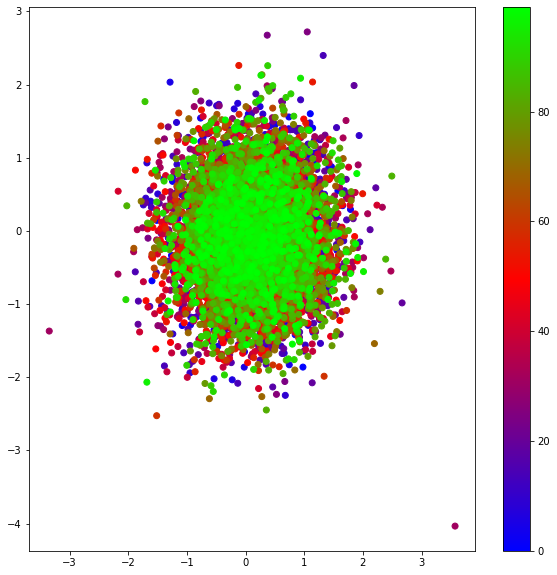

In [49]:


X_valid_encoded_ori = encoder.predict(trainX_test, batch_size=batchSize)
print("-----")
print(X_valid_encoded_ori.shape)
print(X_valid_encoded_ori)

print("-----")
print(trainY.shape)
#print(trainY)

plt.figure(figsize=(10, 10))
plt.scatter(X_valid_encoded_ori[:, 0], X_valid_encoded_ori[:, 1],c=trainY, cmap='brg')
plt.colorbar()
#fig.savefig('Distribution_2_ver6.png')
#plt.show()

In [50]:

'''
with open('Latent_space_200D_T_Shuffled_ver2.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(X_valid_encoded)
'''

"\nwith open('Latent_space_200D_T_Shuffled_ver2.csv', 'w', newline='') as file:\n    mywriter = csv.writer(file, delimiter=',')\n    mywriter.writerows(X_valid_encoded)\n"

In [51]:


# Translate into the latent space
Encoder_spread = Model(encoder_inputs, z_mean)

print("-----")
#print(z_mean.shape)
print(z_mean)
print("-----")
#print(encoder_inputs.shape)
#print(trainX_test.shape)


-----
KerasTensor(type_spec=TensorSpec(shape=(None, 100), dtype=tf.float32, name=None), name='z_mean/BiasAdd:0', description="created by layer 'z_mean'")
-----


In [52]:
#Encoder_spread=encoder

-----
websites
(100, 100)
[[ 0.94025606  0.22328644 -0.45248228 ... -0.40186945 -1.6084778
   1.2555076 ]
 [-0.06688246  0.42653883 -0.8867839  ... -0.5677187  -1.747788
   1.4517668 ]
 [ 0.9018446   0.22048123 -0.48859912 ...  0.4035381  -1.0136051
  -0.47274297]
 ...
 [ 1.0341617  -0.94189614  0.52003443 ...  0.8799934   0.5906405
  -0.30250698]
 [-0.45985028 -0.50118595 -0.5627963  ...  0.59810376  0.13450971
  -0.5458502 ]
 [-0.40126216  1.2029988   0.08101112 ...  1.3008778  -0.09452169
  -0.27231193]]
[ 0.94025606  0.22328644 -0.45248228 -0.4061694  -0.51413405  0.18516533
  2.401262   -0.77472836  1.0612589  -1.0259017   0.86917514 -0.93366915
  0.12517749  0.33948648 -0.20920736  0.8698035  -0.35137123 -1.2362329
 -0.26881018 -0.45322344  0.47047475  0.6633164   0.39585888  0.60357
  0.8124231  -0.61726296 -1.1533014  -0.5714473  -0.4917171   0.18382624
  0.9316241  -0.56068045 -0.24578683 -0.07063536 -0.48350295  0.6314532
 -0.82806605  1.3828474  -0.05617485 -0.4313193   0.35

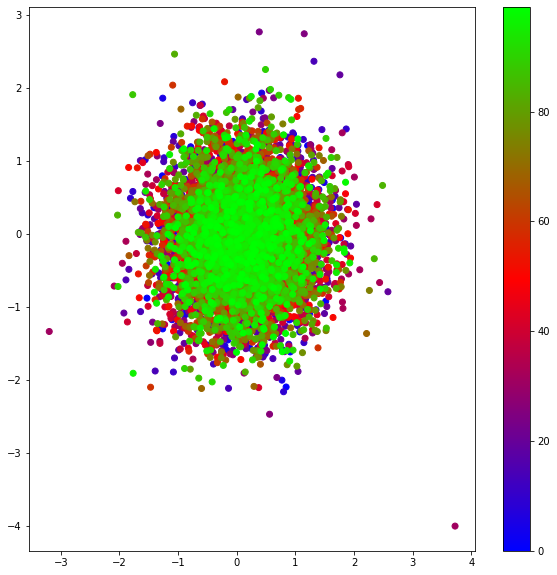

Website_Noise_each_web
(10000, 100)
Website_Noise_each_web_test
(10000, 100)
----------------------------------------------------------------


"\nprint('Dist_Ex')\nprint(Dist_Ex.shape)\nplt.figure(figsize=(10, 10))\nplt.scatter(Dist_Ex[:, 0], Dist_Ex[:, 1],c=trainY, cmap='brg')\nplt.colorbar()\n#plt.show()\n\n\nprint('----------------------------------------------------------------')\n\n\nprint('dist_each_noise')\nprint(dist_each_noise.shape)\nplt.figure(figsize=(10, 10))\nplt.scatter(dist_each_noise[:, 0], dist_each_noise[:, 1],c=trainY, cmap='brg')\nplt.colorbar()\n#plt.show()\n"

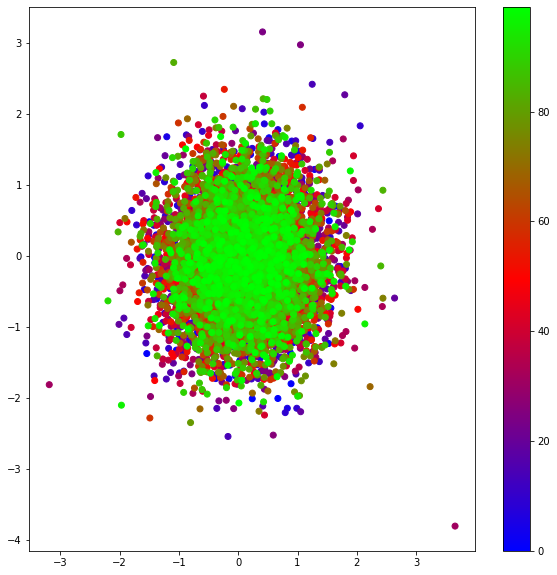

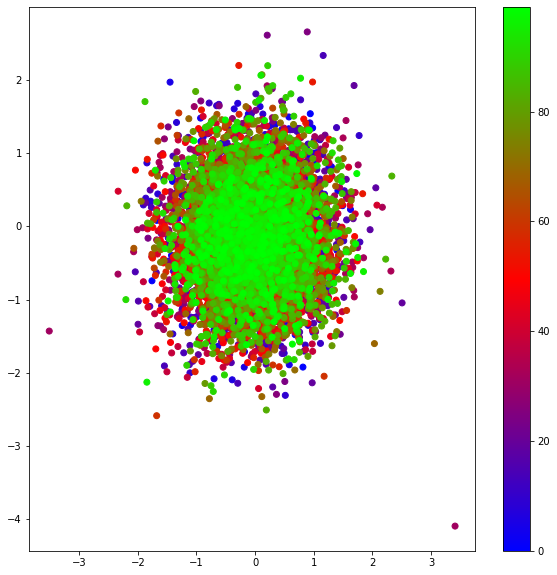

In [53]:

X_valid_encoded_new = Encoder_spread.predict(trainX_test, batch_size=batchSize)
print("-----")
#print(X_valid_encoded.shape)
#print(X_valid_encoded)



#Cut based on the websites (20, 100, 100)
step = 100
Num_websites = 100
measurement = 100

websites = [X_valid_encoded_new[i:i + step] for i in range(0, len(X_valid_encoded_new), step)]
websites=np.asarray(websites)

print('websites')
print(websites[0].shape)
print(websites[0])
print(websites[0,0,:])


print('websites mim & max')
print(websites.min())
print(websites.max())


print('----------------------------------------------------------------')
#Each Websites Mean (20, 100)
mean = [np.mean(websites[i,:],axis=0) for i in range(0, Num_websites)]
mean=np.asarray(mean)
print('mean')
print(mean.shape)
#print(mean[0,:])

print('----------------------------------------------------------------')
#Total Mean (1, 100)
total_mean = 0
for i in range (0,Num_websites):
    total_mean += np.mean(websites[i,:],axis=0)
    
total_mean= total_mean/Num_websites


print('total mean')
print(total_mean.shape)
#print(total_mean)

print('----------------------------------------------------------------')


#Distance from total mean (20,100)
Distance = np.ones((Num_websites,latent_dim))
for i in range (0,Num_websites):
    Distance[i,:] = total_mean - mean[i,:]
    
print('Distance')
print(Distance.shape)
#print(Distance[0])
#print(Distance)

print('Max & min Distance')
print(Distance.max())
print(Distance.min())


#Distance (20,100, 100)
Dis_ex = np.ones((Num_websites,measurement,latent_dim))

for i in range (0,Num_websites):
    for k in range (0,measurement):
        Dis_ex[i,k,:]=Distance[i]

print('Dis_ex')
print(Dis_ex.shape)
print(Dis_ex[0].shape)




print('----------------------------------------------------------------')


#Calculating distance between each website
print('----------------------------------------------------------------')
dist = np.ones((Num_websites,Num_websites,latent_dim))
print(dist.shape)

for i in range (0,Num_websites):
    for k in range (0,Num_websites):
        dist[i,k,:] = mean[i,:] - mean[k,:]
        
dist=np.asarray(dist)
print("dist")
print(dist.shape)

print(dist)


Dis_ex_each = np.zeros((Num_websites,measurement,latent_dim))
print('----------------------------------------------------------------')
for i in range (0,100,Num_websites):
    Dis_ex_each[:,0+i:Num_websites+i,:] = dist
        


    #Dis_ex_each[i,:]=np.append(dist[i,:])

print('Dis_ex_each')
print(Dis_ex_each.shape)
#print(Dis_ex_each)
print('@@@@@@@@@@@@@@@@@@@')
#print(dist-Dis_ex_each)
print('@@@@@@@@@@@@@@@@@@@')


print('----------------------------------------------------------------')




print('----------------------------------------------------------------')

Website_Noise_mean =  websites + Dis_ex


print('Actual Spreading@@@@----------------------------------------------------------------')

Website_Noise_each_web = websites - dist

print('----------------------------------------------------------------')


print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')  
print('test----------------------------------------------------------------')    
#print(dist)
print(dist[0,1,:])

ex = np.zeros((measurement,latent_dim))

test_website = 0
test_measure  = 5

for i in range (0,100):
    ex[i,:] = dist[test_website,test_measure,:]

ex_total= np.zeros((Num_websites,measurement,latent_dim))    
print('----------------------------------------------------------------')
for k in range (0,100,Num_websites):
    ex_total[:,0+k:Num_websites+i,:] = ex

    

print('extended version')
print(ex.shape)

print(websites[0,:].shape)
print(websites[0,:])
print(ex)
print('extended total version')
print(ex_total.shape)
print(ex_total)


Website_Noise_each_web_test = websites - ex
print(Website_Noise_each_web_test)
Website_Noise_each_web_test=np.reshape(Website_Noise_each_web_test,(Num_websites*measurement,latent_dim))

print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')  
print('----------------------------------------------------------------')    




'''
print('----------------------------------------------------------------')    

print('----------------------------------------------------------------')    

print('----------------------------------------------------------------')    
#Website_Noise_test = websites+Dis_ex 
print('Website_Noise by mean value')
print(Website_Noise_mean.shape)
print(Website_Noise_mean)
'''
print('----------------------------------------------------------------')

print('Website_Noise_each_web and spead')
print(Website_Noise_each_web.shape)
print(Website_Noise_each_web)

print('----------------------------------------------------------------')



#Reshaping
Website_Noise_mean=np.reshape(Website_Noise_mean,(Num_websites*measurement,latent_dim))
Website_Noise_each_web=np.reshape(Website_Noise_each_web,(Num_websites*measurement,latent_dim))
#Website_Noise_each_web_test=np.reshape(Website_Noise_each_web_test,(Num_websites*measurement,latent_dim))

#Distance Test
#Dist_Ex=np.reshape(New_Dis,(Num_websites*samples,latent_dim))
#dist_each_noise = np.reshape(dist,(Num_websites*samples,latent_dim))

#Plotting Website with Noise
print('Website_Noise_mean')
print(Website_Noise_mean.shape)
plt.figure(figsize=(10, 10))
plt.scatter(Website_Noise_mean[:, 0], Website_Noise_mean[:, 1],c=trainY, cmap='brg')
plt.colorbar()
plt.show()



print('Website_Noise_each_web')
print(Website_Noise_each_web.shape)
plt.figure(figsize=(10, 10))
plt.scatter(Website_Noise_each_web[:, 0], Website_Noise_each_web[:, 1],c=trainY, cmap='brg')
plt.colorbar()
#plt.show()

print('Website_Noise_each_web_test')
print(Website_Noise_each_web.shape)
plt.figure(figsize=(10, 10))
plt.scatter(Website_Noise_each_web_test[:, 0], Website_Noise_each_web_test[:, 1],c=trainY, cmap='brg')
plt.colorbar()
#plt.show()




print('----------------------------------------------------------------')

'''
print('Dist_Ex')
print(Dist_Ex.shape)
plt.figure(figsize=(10, 10))
plt.scatter(Dist_Ex[:, 0], Dist_Ex[:, 1],c=trainY, cmap='brg')
plt.colorbar()
#plt.show()


print('----------------------------------------------------------------')


print('dist_each_noise')
print(dist_each_noise.shape)
plt.figure(figsize=(10, 10))
plt.scatter(dist_each_noise[:, 0], dist_each_noise[:, 1],c=trainY, cmap='brg')
plt.colorbar()
#plt.show()
'''

In [54]:

z_mean, z_log_var, z = vae.encoder.predict(trainX_test)

print(z_mean.shape)
print(z_log_var.shape)
print(z.shape)
#print(z_mean.shape,z_log_var.shape,z.shape)
print(type(z))
#print(z_mean)
re_generated_x = vae.decoder.predict(z)
#print(z)

print(z_mean.shape)
#print(z_mean[0,:])

print(z_log_var.shape)
#print(z_log_var[0,:])

print(z.shape)
#print(z[0,:])

print(re_generated_x.shape)
#print(reconstructed_x[0,:].shape)




(10000, 100)
(10000, 100)
(10000, 100)
<class 'numpy.ndarray'>
(10000, 100)
(10000, 100)
(10000, 100)
(10000, 6000, 1)


Text(0, 0.5, 'PnP timing')

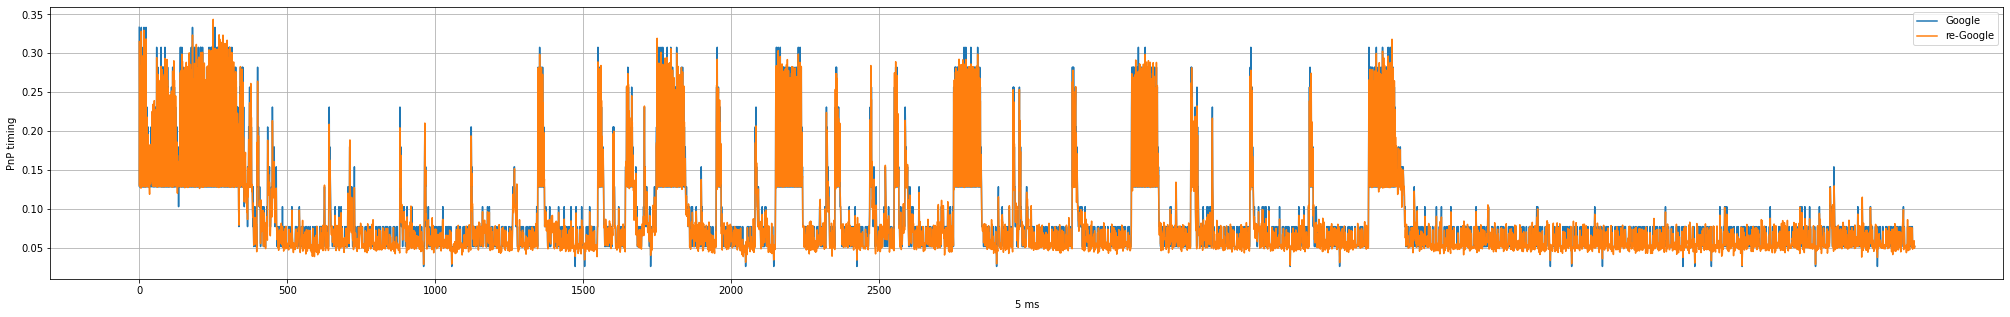

In [55]:
fig = plt.figure(figsize=(35,5))
#plt.plot(trainX_test[0],label='Google')
#plt.plot(trainX_test[2],label='Google')
#plt.plot(trainX_test[1],label='Amazon')

#for i in range (1,2):
#  plt.plot(reconstructed_x[i],label=i)

#plt.plot(re_generated_x[0],label='360')
#plt.plot(re_generated_x[100],label='9gag')
#plt.plot(re_generated_x[200],label='abs-cbn')
#plt.plot(re_generated_x[300],label='adobe')
plt.plot(trainX_test[3600],label='Google')
plt.plot(re_generated_x[3600],label='re-Google')


#plt.plot(trainX_test[0],label='original')
#plt.plot(reconstructed_x[1],label='1')


#plt.plot(reconstructed_x[1],label='re1')
#plt.plot(reconstructed_x[2],label='re2')
#plt.plot(data3[0],label=3)
#plt.plot(data4[0],label=4)
#plt.plot(averageArray[0])

plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 3000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('RegeneratedGoogle.jpeg')
#plt.show()

In [56]:
classification_model = tf.keras.models.load_model('/home/seonghun/Research/WebsiteFingerPrinting/Firefox_Collected_100/Model_Test_100_6000_US_firefox_final.h5')

In [57]:
print(re_generated_x.shape)
re_generated_x_save = np.squeeze(re_generated_x)

print(re_generated_x_save.shape)


(10000, 6000, 1)
(10000, 6000)


In [58]:
#print(trainY)
trainY_ca= keras.utils.to_categorical(trainY)
print(trainY_ca.shape)

(10000, 100)


In [59]:
 prediction = np.argmax(classification_model.predict(re_generated_x_save), axis=1)

 print(prediction.shape)
 print(prediction[0:700])

(10000,)
[ 0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0 44 44  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0  0  0
  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 11  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 41  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3

In [60]:
test = classification_model.predict(re_generated_x_save)
print(test.shape)

print(test[0][0])
print(test[0][1])
print(test[100][0])
print(test[100][1])
#print(test[0][3])

(10000, 100)
0.99819416
2.3581706e-11
4.547535e-10
0.9981451


In [61]:
score = classification_model.evaluate(re_generated_x_save, trainY_ca, verbose=0)
print(" loss:", score[0])
print("accuracy:", score[1])
print(score)

 loss: 0.10348343849182129
accuracy: 0.9779000282287598
[0.10348343849182129, 0.9779000282287598]


In [62]:
print(score)

[0.10348343849182129, 0.9779000282287598]


In [63]:
#with open('textfile.txt', 'w',encoding='utf-8') as f:
#    f.write(str(score[1])+'\n')

In [64]:
'''

for i in range (0,10):
    with open(f"{i}.txt", w) as f:
        f.write(text)
        
'''

'\n\nfor i in range (0,10):\n    with open(f"{i}.txt", w) as f:\n        f.write(text)\n        \n'

In [65]:
#Website_Noise_test_2=np.reshape(Website_Noise_test_2,(2000,100))

# Distance Calculations


In [66]:
'''
with open('Ditance_each(Sep12)_100D_Shuffled_T.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(dist)
    '''

"\nwith open('Ditance_each(Sep12)_100D_Shuffled_T.csv', 'w', newline='') as file:\n    mywriter = csv.writer(file, delimiter=',')\n    mywriter.writerows(dist)\n    "

In [67]:
print(dist.shape)

(100, 100, 100)


In [68]:
print(dist)

[[[ 0.          0.          0.         ...  0.          0.
    0.        ]
  [ 0.20121823  0.03796561 -0.10746494 ...  0.42567503 -0.16894065
   -0.14654732]
  [ 0.11208707  0.35404646 -0.01295748 ... -0.46137083 -0.89686167
    0.13385977]
  ...
  [ 0.15612364  0.41643548 -0.23364857 ...  0.59299529 -0.53169227
   -0.00670372]
  [ 0.09479351  0.15977484 -0.09078828 ...  0.61972117 -0.52554524
   -0.02672069]
  [ 0.11524819  0.16996534  0.09883973 ...  0.12599787 -1.45276225
   -0.0886039 ]]

 [[-0.20121823 -0.03796561  0.10746494 ... -0.42567503  0.16894065
    0.14654732]
  [ 0.          0.          0.         ...  0.          0.
    0.        ]
  [-0.08913116  0.31608087  0.09450746 ... -0.88704586 -0.72792101
    0.2804071 ]
  ...
  [-0.04509459  0.37846988 -0.12618363 ...  0.16732024 -0.3627516
    0.13984361]
  [-0.10642472  0.12180924  0.01667666 ...  0.19404612 -0.35660461
    0.11982664]
  [-0.08597004  0.13199973  0.20630467 ... -0.29967713 -1.28382158
    0.05794343]]

 [[-0

In [69]:
from scipy.spatial import distance

#print (dist)
#print(dist[0,1,:])
print(dist.shape)

distance_each = np.ones((Num_websites,Num_websites))
print(distance_each.shape)

for i in range(0,measurement):
    for k in range (0,measurement):
        distance_each[i,k]= distance.euclidean(dist[0,i,:] ,dist[0,k,:])
        #print(distance_each)
        
#print(distance_each.shape)
distance_each=np.asarray(distance_each)
print(distance_each.shape)
print(distance_each)
print(distance_each[0])
print(distance_each[0][1])
print(distance_each[0][43])

print(distance.euclidean(distance_each[0][1],distance_each[0][43]))


(100, 100, 100)
(100, 100)
(100, 100)
[[0.         5.15902378 4.99381312 ... 4.63425803 6.11241284 5.77495745]
 [5.15902378 0.         5.28371539 ... 3.8859584  6.00989761 5.78313318]
 [4.99381312 5.28371539 0.         ... 4.81917678 6.59178389 5.60926106]
 ...
 [4.63425803 3.8859584  4.81917678 ... 0.         5.62252436 5.35613509]
 [6.11241284 6.00989761 6.59178389 ... 5.62252436 0.         5.99530903]
 [5.77495745 5.78313318 5.60926106 ... 5.35613509 5.99530903 0.        ]]
[0.         5.15902378 4.99381312 5.82586593 4.92136454 5.23671424
 4.49497849 4.43499751 4.84081969 4.9760767  4.44977678 4.02151697
 4.70335187 4.65895875 4.70147875 5.30817015 4.6854653  5.13982022
 4.68472161 5.26597763 4.53659214 4.79500884 4.34228796 5.11977617
 5.44996425 4.81315017 4.6930593  4.68471404 4.78236352 4.59959023
 4.75416542 5.07216221 5.57425941 4.63331067 4.28523208 5.56182683
 4.48659766 4.02330829 4.2831928  4.57802812 5.28485514 5.29975714
 4.64827901 4.88517917 4.58484635 4.49494015 4.84

In [70]:
#distance = pd.read_csv('Ditance_each.csv', header=None)

# From here with noise


In [71]:
new_z = Lambda(sampling)([Website_Noise_mean, z_log_var])
#new_z = Lambda(sampling)([z_mean, z_log_var])
#print(new_z)
np.array(new_z)

print(type(new_z))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [72]:
generated_x_noise = vae.decoder.predict(new_z)
print(generated_x_noise.shape)
#print(reconstructed_x[0,:].shape)


(10000, 6000, 1)


Text(0, 0.5, 'PnP timing')

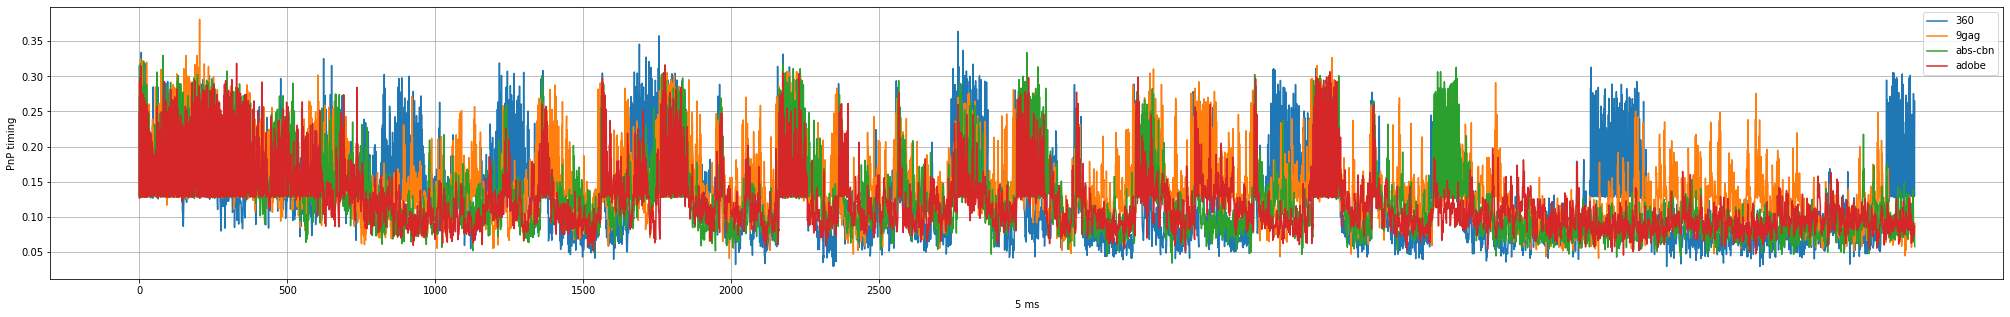

In [73]:

fig = plt.figure(figsize=(35,5))
#plt.plot(trainX_test[0],label='Google')
#plt.plot(trainX_test[2],label='Google')
#plt.plot(trainX_test[1],label='Amazon')

#for i in range (1,300,100):
#  plt.plot(generated_x_noise[i],label=i)

plt.plot(generated_x_noise[0],label='360')
plt.plot(generated_x_noise[100],label='9gag')
plt.plot(generated_x_noise[200],label='abs-cbn')
plt.plot(generated_x_noise[300],label='adobe')

#plt.plot(reconstructed_x_new[0],label='reconstructed-Amazon')
#plt.plot(reconstructed_x_new[100],label='reconstructed-Google')
#plt.plot(trainX_test[0],label='original')
#plt.plot(reconstructed_x[1],label='1')


#plt.plot(reconstructed_x[1],label='re1')
#plt.plot(reconstructed_x[2],label='re2')
#plt.plot(data3[0],label=3)
#plt.plot(data4[0],label=4)
#plt.plot(averageArray[0])

plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 3000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData2_new.png')
#plt.show()

In [74]:
generated_x_noise_save = np.squeeze(generated_x_noise)
print(generated_x_noise_save.shape)

(10000, 6000)


In [75]:
 prediction_new = np.argmax(classification_model.predict(generated_x_noise_save), axis=1)

 print(prediction_new.shape)
 print(prediction_new[0:1000])

(10000,)
[ 0  0 38 92 92 92  0 92 92 92 80 92  0  0  6  0  0 92 13  0 92 44 44 92
 17 92 92 92  0 92 92  6 92  0  0 92 92 92 92 92 92 44 92  0 92 92 38  0
 92 92 92 92 92  0 92  0 92 89  0 92 92 37 92 57 44  0 92  0 92 92 92 44
  0 92 92 92 44 17  0 10 92 44 92 92 92 10  0  0 92 38 92 92 10 92  0  0
  0 92  0  0 92 92 38 52 92 38  3 38 52 38 52 48 92 55 52 92 92 27  3 78
 52 64 97 92 52 92 92 90 55 10 52 64 92 92 55 13 93 38 38 92 64 38 90 92
 92 39 52 64 92 46 46 92 93 77 92 92 93 52 52 64 92 38 92 64 92 38 11 92
 46 93 10 90 38 38 38 38 92 92 92 52 10 11 92 38 92 97 13 88 90 92 88 11
 52 34 92 35 82 64 38 92 10 10 92 92 92 54  6 92 92 46 64  6 82 82 52 92
 10 82 52 90 52 82  6 92 82 92 46  6 90 46 92 46 46 92 82  6 55 68 45 10
  3 13 52 90 90 82 92  6  6 10 52  6 82  6 93 52 82 46 16  6 34 92 46 82
 93 52 97  6 46 92 92 97 93 38 13 13 46 92  6 82 52  6 92  6 92 90 82 82
  6 37 64 82 46 35  6 82 34 92 37 52 10 52 10 64 10 10 90 92 92 92 93 92
 92 92 92 46 52 92 55 64 13 10 92 93 92 46

In [76]:
score = classification_model.evaluate(generated_x_noise_save, trainY_ca, verbose=0)
print(" loss:", score[0])
print("accuracy:", score[1])
print(score)
#print("accuracy:", score[1])

 loss: 8.503023147583008
accuracy: 0.08269999921321869
[8.503023147583008, 0.08269999921321869]


Text(0, 0.5, 'PnP timing')

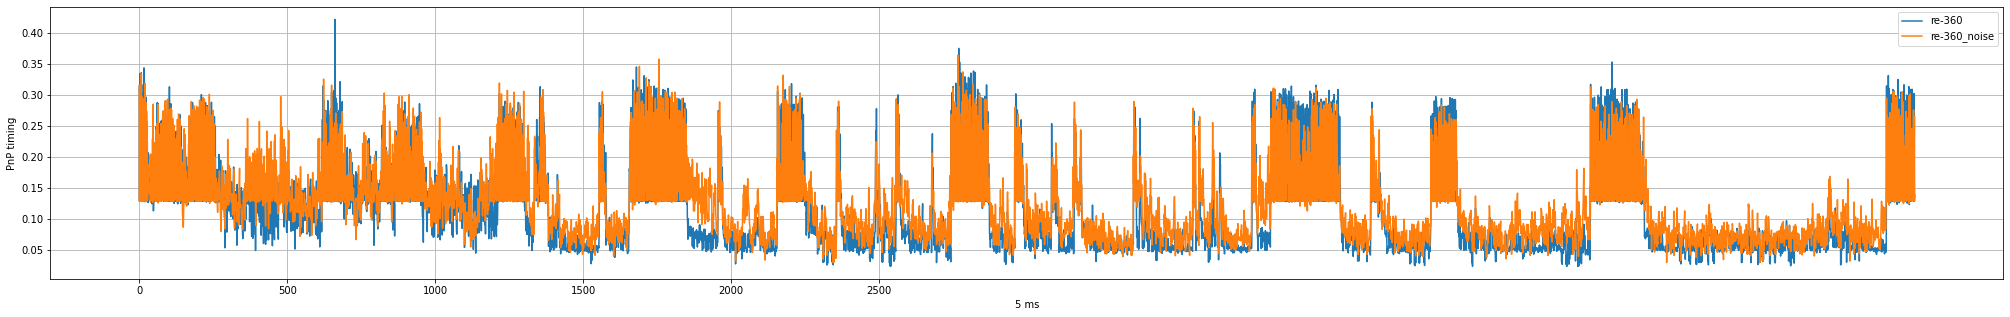

In [77]:
fig = plt.figure(figsize=(35,5))

'''
for i in range (1,100,100):
  #plt.plot(trainX_test[i],label=i)
  plt.plot(re_generated_x[i],label=i)
  plt.plot(generated_x_noise[i],label=i)
'''
plt.plot(re_generated_x[0],label='re-360')
plt.plot(generated_x_noise[0],label='re-360_noise')


plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 3000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData20.png')
#plt.show()

Text(0, 0.5, 'PnP timing')

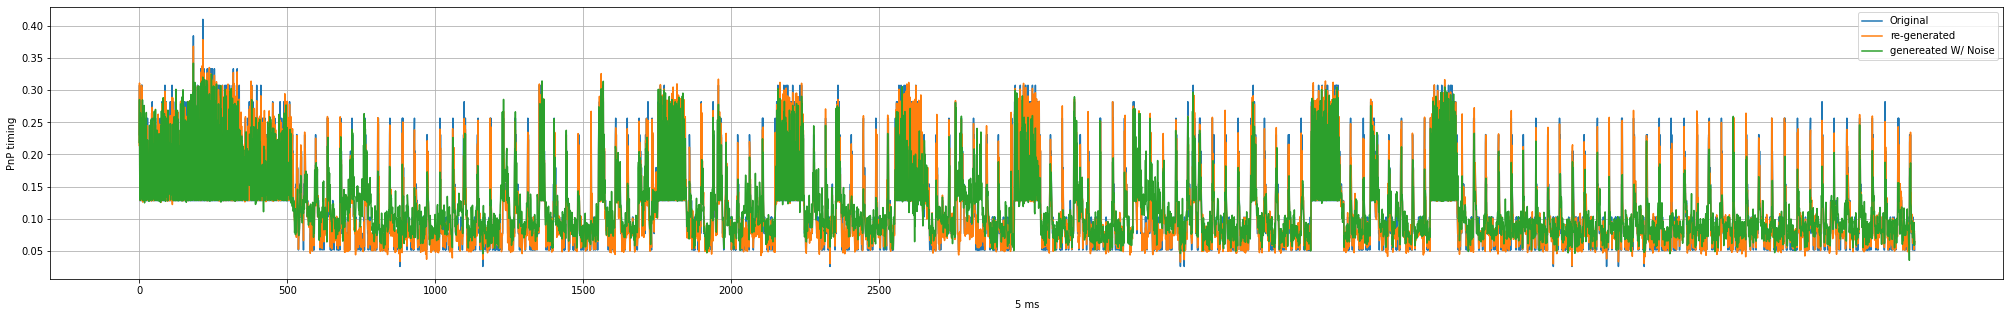

In [78]:
fig = plt.figure(figsize=(35,5))
#plt.plot(trainX_test[0],label='Google')
#plt.plot(trainX_test[2],label='Google')
#plt.plot(trainX_test[1],label='Amazon')

#for i in range (1,2):
#  plt.plot(trainX_test[i],label=i)

#plt.plot(trainX_test[0],label='Amazon')
#plt.plot(trainX_test[100],label='Google')

plt.plot(trainX_test[3800],label='Original')
plt.plot(re_generated_x[3800],label='re-generated')
plt.plot(generated_x_noise[3800],label='genereated W/ Noise')

#plt.plot(decision_boundary_new[0],label='Decision Boundary')
#plt.plot(decision_boundary_new[1],label='Decision Boundary')

plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 3000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData20.png')
#plt.show()

# Each Distance

## playing in latent space

In [79]:
print(Website_Noise_each_web)

[[ 0.94025606  0.22328644 -0.45248228 ... -0.40186945 -1.60847783
   1.25550759]
 [-0.26810069  0.38857321 -0.77931896 ... -0.99339372 -1.5788473
   1.59831417]
 [ 0.78975755 -0.13356523 -0.47564164 ...  0.86490893 -0.11674345
  -0.60660274]
 ...
 [ 0.5588194  -0.3759352   0.26849782 ... -1.10325748  0.94081312
  -0.55583906]
 [ 0.43787453  0.68433262 -1.00081289 ... -1.68321085 -0.13880467
   0.05632286]
 [-0.31133601 -0.08233233 -0.54139596 ...  0.57992512  2.3585515
   1.33009934]]


In [80]:
print(Website_Noise_each_web.shape)

(10000, 100)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import cross_val_score
# Initializing Classifiers
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = SVC(gamma='auto')
clf5 = GaussianNB()
clf6 = MLPClassifier()





clf6.fit(Website_Noise_each_web,trainY[:,0])




/home/seonghun/tensorflow/test/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier()

In [82]:
 from sklearn.metrics import accuracy_score

In [83]:
print(trainY[:,0].shape)

(10000,)


In [84]:
Latent_train, Latent_valid, Latent_y_train, Latent_y_valid = train_test_split(X_valid_encoded_ori, trainY[:,0] ,test_size=0.2)

print("--------------Data--------------")
print("Orignal X shape: {}".format(Website_Noise_each_web.shape))
print("Origianl Y shape: {}".format(trainY[:,0].shape))

print("--------------Train Data--------------")
print("X_train shape: {}".format(Latent_train.shape))
print("y_train shape: {}".format(Latent_y_train.shape))

print("--------------Validation Data--------------")
print("X_val shape: {}".format(Latent_valid.shape))
print("y_val shape: {}".format(Latent_y_valid.shape))


--------------Data--------------
Orignal X shape: (10000, 100)
Origianl Y shape: (10000,)
--------------Train Data--------------
X_train shape: (8000, 100)
y_train shape: (8000,)
--------------Validation Data--------------
X_val shape: (2000, 100)
y_val shape: (2000,)


In [85]:
clf6.fit(Latent_train,Latent_y_train)

MLPClassifier()

In [86]:
print(accuracy_score(Latent_y_valid, clf6.predict(Latent_valid)))

0.8955


In [87]:
new_z_each = Lambda(sampling)([Website_Noise_each_web, z_log_var])
#new_z = Lambda(sampling)([z_mean, z_log_var])
#print(new_z)
np.array(new_z_each)

print(type(new_z_each))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [88]:
generated_x_noise_each = vae.decoder.predict(new_z_each)
print(generated_x_noise_each.shape)
#print(reconstructed_x[0,:].shape)


(10000, 6000, 1)


Text(0, 0.5, 'PnP timing')

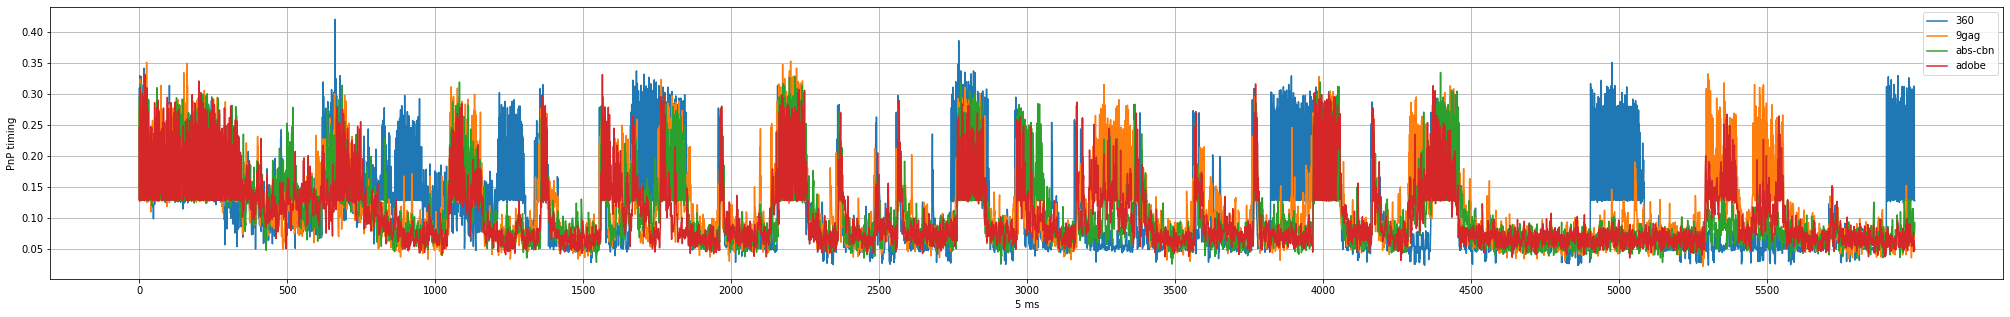

In [89]:

fig = plt.figure(figsize=(35,5))
#plt.plot(trainX_test[0],label='Google')
#plt.plot(trainX_test[2],label='Google')
#plt.plot(trainX_test[1],label='Amazon')

#for i in range (1,400,100):
#  plt.plot(generated_x_noise_each[i],label=i)


plt.plot(generated_x_noise_each[0],label='360')
plt.plot(generated_x_noise_each[100],label='9gag')
plt.plot(generated_x_noise_each[200],label='abs-cbn')
plt.plot(generated_x_noise_each[300],label='adobe')


#plt.plot(reconstructed_x_new[0],label='reconstructed-Amazon')
#plt.plot(reconstructed_x_new[100],label='reconstructed-Google')
#plt.plot(trainX_test[0],label='original')
#plt.plot(reconstructed_x[1],label='1')


#plt.plot(reconstructed_x[1],label='re1')
#plt.plot(reconstructed_x[2],label='re2')
#plt.plot(data3[0],label=3)
#plt.plot(data4[0],label=4)
#plt.plot(averageArray[0])

plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 6000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData2_new.png')
#plt.show()

In [90]:
generated_x_noise_each_save = np.squeeze(generated_x_noise_each)
print(generated_x_noise_each_save.shape)

(10000, 6000)


In [92]:
prediction_new = np.argmax(classification_model.predict(generated_x_noise_each_save), axis=1)

print(prediction_new.shape)
print(prediction_new[0:1000])

(10000,)
[ 0 18  2  3  4  5  6  7  8  9 77 13 38 10 92 96 56 17 18 18 52 88 18 23
 39 25 92 17 89 44 30 20 96 96  0 35 36 90 35 97 80 96 42 20 44 45 46 20
 48 49 50 96 52 53 54  5 56 54 10 89 60 61 62 22  5 56 97 67 10 97 70 71
  0 73 43 75 52 57 88 79 80 75 82 11 20 20 14 93 88 52 90 91 92 93 97  0
 18 97  0  0  0  1  2  3  4  5  6 38 72 36 10 11 12 13 97  1 56 17 18  1
 20 82 52 23 24 13 82 90 92 93 30 20  1 20 34 35 36 92 38 97 40  1 42 43
 44 92 46 47 35 49 50  1 52 83 54 97 56 57 58 78 60 61 62 56 38 65 20 67
 68 66 70 71 72 46  1 75 76 77 78 79 80 92 82 83  1 11 64 87 20 89 90 91
 92 93 94 95 18 97 98 99 44 20  2  3  4 52  6  7 72  9 10 59 23 13 14 43
 90 17 18 20 97 21 22 23 88 25 82 27 77 44 30 20 20 82 37 35 36 92 38 55
 11 20 42 20 44 45 46 47 48 49 50 20 52 11 54 52 56 57 56 13 60 61 62 63
 52 65 66 67 68 89 70 71 72 58 96 56 76 77 78 79 80 75 82 59 51 43 86 87
 88 67 90 91 92 93 94 95 96 97 98 99 44 20  2  3  4  5  6  7  8  9 10 11
 12 13 97 43 90 17 18 51 20 55 22 23 24 25

In [93]:
prediction_new_score = classification_model.predict(generated_x_noise_each_save)

print(prediction_new_score.shape)
print(prediction_new_score[2])
print(prediction_new_score[1][1],prediction_new_score[1][20])

import heapq
import numpy

heapq.nlargest(10, range(len(prediction_new_score[2])), prediction_new_score[2].take)


#heapq.nlargest(3, range(len(prediction_new_score)), prediction_new_score.__getitem__)


(10000, 100)
[2.15917895e-10 2.19088281e-09 9.38880801e-01 6.09893501e-02
 8.89044394e-10 7.39944911e-11 2.76863088e-10 3.66061140e-11
 8.52296762e-06 3.84141003e-07 9.60802726e-09 1.82364765e-05
 2.04666526e-06 7.51977859e-06 7.66510466e-11 6.51154044e-13
 1.22108986e-06 4.17977475e-08 2.25286627e-13 3.41595090e-08
 1.25367273e-12 1.45123297e-11 7.86295404e-11 2.24820687e-05
 2.35667930e-08 4.87384044e-09 1.05223322e-07 7.99362354e-10
 1.39482296e-07 7.79490321e-08 1.72110692e-09 2.07110062e-08
 1.17190233e-11 5.62219162e-13 3.70354268e-11 1.03052700e-09
 4.36297637e-10 1.38569050e-07 2.15001172e-09 1.48906410e-14
 1.98645397e-12 4.38128266e-13 3.34273076e-09 6.09941875e-10
 2.20860315e-07 3.71555342e-09 1.65696856e-05 9.73831016e-11
 4.63015903e-10 4.04418010e-09 2.92624480e-09 1.48751996e-14
 3.90940730e-15 9.87648647e-08 3.48060354e-07 9.13385379e-16
 8.74914637e-12 1.90300076e-12 3.34421969e-07 6.21286745e-06
 4.45365056e-12 5.94122028e-13 1.03601542e-13 1.65380687e-08
 1.43520330

[2, 3, 83, 23, 11, 46, 8, 88, 13, 59]

In [94]:
score_noise = classification_model.evaluate(generated_x_noise_each_save, trainY_ca, verbose=0)
print(" loss:", score_noise[0])
print("accuracy:", score_noise[1])
print(score_noise)
#print("accuracy:", score[1])

 loss: 15.015559196472168
accuracy: 0.03150000050663948
[15.015559196472168, 0.03150000050663948]


In [95]:
#with open('textfile.txt_noise', 'w',encoding='utf-8') as f:
#    f.write(str(score_noise[1])+'\n')

In [96]:
trainY_test = np.ones((10000,1))
#trainY_test_v = np.ones((10000,1))

for k in range (0,100):
    for i in range (0,100):
        trainY_test[i+k*100]=int(i)
    
#trainY_test=
print(trainY_test.shape)
print(trainY_test[800:10000])


(10000, 1)
[[ 0.]
 [ 1.]
 [ 2.]
 ...
 [97.]
 [98.]
 [99.]]


In [97]:
trainY_test_ca= keras.utils.to_categorical(trainY_test)

In [98]:
score_noise_test = classification_model.evaluate(generated_x_noise_each_save, trainY_test_ca, verbose=0)
print(" loss:", score_noise_test[0])
print("accuracy:", score_noise_test[1])
print(score_noise_test)
#print("accuracy:", score[1])

 loss: 1.887593388557434
accuracy: 0.5963000059127808
[1.887593388557434, 0.5963000059127808]


In [99]:
#print(trainY)
#trainY_test_re=np.reshape(trainY_test,(10000))

#trainY_test_ca= keras.utils.to_categorical(trainY_test_re)
#print(trainY_test_ca.shape)


In [100]:
print(type(prediction_new))
print(type(trainY_test))

prediction_new=np.reshape(prediction_new,(10000))
trainY_test_re=np.reshape(trainY_test,(10000))

print(prediction_new)
print(trainY_test_re)

print(prediction_new.shape,trainY_test_re.shape)

extraction=prediction_new- trainY_test_re

print(extraction.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 0 18  2 ... 97 98 99]
[ 0.  1.  2. ... 97. 98. 99.]
(10000,) (10000,)
(10000,)


In [134]:
print(extraction[0:100])

[  0.  17.   0.   0.   0.   0.   0.   0.   0.   0.  67.   2.  26.  -3.
  78.  81.  40.   0.   0.  -1.  32.  67.  -4.   0.  15.   0.  66. -10.
  61.  15.   0. -11.  64.  63. -34.   0.   0.  53.  -3.  58.  40.  55.
   0. -23.   0.   0.   0. -27.   0.   0.   0.  45.   0.   0.   0. -50.
   0.  -3. -48.  30.   0.   0.   0. -41. -59.  -9.  31.   0. -58.  28.
   0.   0. -72.   0. -31.   0. -24. -20.  10.   0.   0.  -6.   0. -72.
 -64. -65. -72.   6.   0. -37.   0.   0.   0.   0.   3. -95. -78.   0.
 -98. -99.]


In [135]:
from collections import Counter

for i in range (0,10000,100):
    locals()['web_'+str(i)]=extraction[0+i:100+i]

    
#extracted correct
webs = [extraction[i:i + 100] for i in range(0, len(extraction), 100)]
webs=np.asarray(webs)
print(web_0)
#print(web_0)
#locals()['변수명'+str(i)]


#index that correctly change to websites
for j in range (0,100):
    locals()['ind_'+str(j)]=([i for i,x in enumerate(webs[j]) if x==0])
    #temp=([i for i,x in enumerate(webs[j]) if x==0])
    
for k in range (0,100):
    print(locals()['ind_'+str(k)])
    
print("@@@@@@@@")
#print(temp[0])

total_test = []
#print(ind_0+ind_1+ind_2)
for k in range (0,100):
    total_test = total_test + locals()['ind_'+str(k)]
    
#total = np.concatenate((ind_0,ind_1,ind_2,ind_3,ind_4,ind_5,ind_6,ind_7,ind_8,ind_9))

print(total_test)
print("@@@@@@@@")
count_total = Counter(total_test)
print(count_total)

[  0.  17.   0.   0.   0.   0.   0.   0.   0.   0.  67.   2.  26.  -3.
  78.  81.  40.   0.   0.  -1.  32.  67.  -4.   0.  15.   0.  66. -10.
  61.  15.   0. -11.  64.  63. -34.   0.   0.  53.  -3.  58.  40.  55.
   0. -23.   0.   0.   0. -27.   0.   0.   0.  45.   0.   0.   0. -50.
   0.  -3. -48.  30.   0.   0.   0. -41. -59.  -9.  31.   0. -58.  28.
   0.   0. -72.   0. -31.   0. -24. -20.  10.   0.   0.  -6.   0. -72.
 -64. -65. -72.   6.   0. -37.   0.   0.   0.   0.   3. -95. -78.   0.
 -98. -99.]
[0, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18, 23, 25, 30, 35, 36, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 60, 61, 62, 67, 70, 71, 73, 75, 79, 80, 82, 88, 90, 91, 92, 93, 97]
[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 17, 18, 20, 23, 24, 30, 34, 35, 36, 38, 40, 42, 43, 44, 46, 47, 49, 50, 52, 54, 56, 57, 58, 60, 61, 62, 65, 67, 68, 70, 71, 72, 75, 76, 77, 78, 79, 80, 82, 83, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99]
[2, 3, 4, 6, 7, 9, 10, 13, 14, 17, 18, 21, 22, 23, 25, 27, 30, 35, 36, 38, 42, 44

Text(0, 0.5, 'PnP timing')

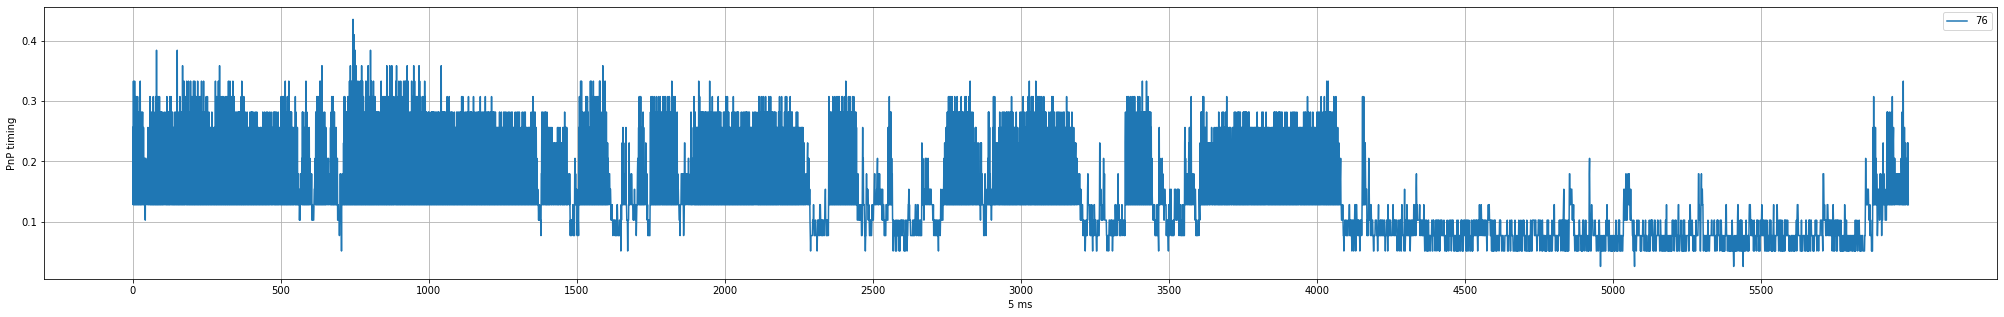

In [136]:
fig = plt.figure(figsize=(35,5))

'''
for i in range (1,100,100):
  #plt.plot(trainX_test[i],label=i)
  plt.plot(re_generated_x[i],label=i)
  plt.plot(generated_x_noise[i],label=i)
'''
#plt.plot(re_generated_x[4000],label='re-google')
#plt.plot(generated_x_noise_each[4000],label='re-google_noise')
plt.plot(trainX_test[8805],label='76')
#plt.plot(re_generated_x[5],label='76')
#plt.plot(generated_x_noise_each[5],label='76')
#plt.plot(re_generated_x[7600],label='76')


plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 6000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData20.png')
#plt.show()

# Single Test

In [137]:
print(ind_0)

[0, 2, 3, 4, 5, 6, 7, 8, 9, 17, 18, 23, 25, 30, 35, 36, 42, 44, 45, 46, 48, 49, 50, 52, 53, 54, 56, 60, 61, 62, 67, 70, 71, 73, 75, 79, 80, 82, 88, 90, 91, 92, 93, 97]


In [138]:
print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')  
print('test----------------------------------------------------------------')    
#print(dist)
print(dist[0,1,:])

test_website = 0
test_measure  = 0 #locals()['ind_'+str(k)][1]
print(test_measure)


'''
print(len(ind_0))

for j in range (0,len(ind_0)):
    temp=ind_0[j]
    
    for i in range (0,100):
        ex_t[i,:] = dist[test_website,temp,:]
        ex_total_t[:,0+k:100+k,:] = ex
        
'''
ex = np.zeros((measurement,latent_dim))





for i in range (0,100):
    ex[i,:] = dist[test_website,test_measure,:]   #dist[web0,meauremet5]
    
    
print('----------------------------------------------------------------')
ex_total= np.zeros((Num_websites,measurement,latent_dim))    

for k in range (0,100,Num_websites):
    ex_total[:,0+k:Num_websites+k,:] = ex

    

print('extended version')
print(ex.shape)

print('Website')
print(websites[test_website,:].shape)
print(websites[test_website,:])
print('extended version')
print(ex)
print('extended total version')
print(ex_total.shape)
print(ex_total)


Website_Noise_each_web_test = websites - ex_total
print('result')
print(Website_Noise_each_web_test)

Website_Noise_each_web_test=np.reshape(Website_Noise_each_web_test,(Num_websites*measurement,latent_dim))

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
test----------------------------------------------------------------
[ 2.01218233e-01  3.79656106e-02 -1.07464939e-01  4.19339873e-02
  3.83454636e-02 -1.91340864e-01  3.09760988e-01  1.17289603e-01
  2.84630090e-01 -3.54947710e+00 -2.46896684e-01 -3.47827077e-02
  5.38696289e-01  1.36345252e-01 -3.76101315e-01 -9.16123539e-02
 -7.54995048e-02 -9.94057298e-01  6.44971550e-01 -2.62785912e-01
 -7.46980608e-02  8.08390737e-01 -5.63714743e-01 -1.64687514e-01
 -6.23805225e-02  8.38570744e-02 -2.12289274e-01 -1.66211903e-01
  1.61529273e-01 -3.90328988e-02  3.89454275e-01  9.98259783e-02
 -3.21348369e-01  3.79267931e-02  3.43198240e-01  1.66273326e-01
 -3.70684922e-01 -5.11674106e-01 -3.50695923e-02 -3.28180492e-01
 -1.37201473e-01 -2.27317885e-02 -1.95944682e-01 -1.63246453e-01
  3.16171199e-01 -4.43943441e-02  2.03392535e-01  3.27464119e-02
  1.69027299e-01  1.47937417e+00  4.90323678e-02  3.58972728e-01
  5.53961061e-02 -4.16255653e-01  5.7554

In [139]:
new_z_each_test = Lambda(sampling)([Website_Noise_each_web_test, z_log_var])
#new_z = Lambda(sampling)([z_mean, z_log_var])
#print(new_z)
np.array(new_z_each_test)

print(type(new_z_each_test))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [140]:
generated_x_noise_each_test = vae.decoder.predict(new_z_each_test)
print(generated_x_noise_each_test.shape)
#print(reconstructed_x[0,:].shape)


(10000, 6000, 1)


Text(0, 0.5, 'PnP timing')

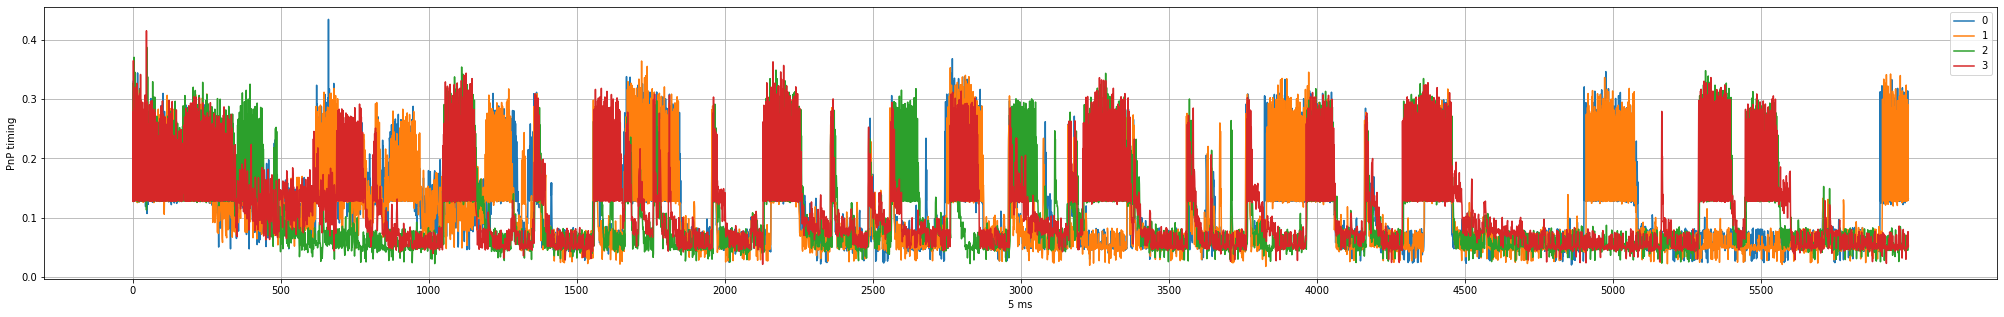

In [141]:

fig = plt.figure(figsize=(35,5))

plt.plot(generated_x_noise_each_test[0],label='0')
plt.plot(generated_x_noise_each_test[1],label='1')
plt.plot(generated_x_noise_each_test[2],label='2')
plt.plot(generated_x_noise_each_test[3],label='3')


plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 6000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData2_new.png')
#plt.show()

In [142]:
generated_x_noise_each_test_save = np.squeeze(generated_x_noise_each_test)
print(generated_x_noise_each_test_save.shape)

(10000, 6000)


In [143]:
prediction_new_test = np.argmax(classification_model.predict(generated_x_noise_each_test_save), axis=1)

print(prediction_new_test.shape)
print(prediction_new_test[test_website*100:test_website*100+100])
#print(prediction_new_test[1000:1100])

(10000,)
[ 0  0  0  0  0  0  0  0  0  0 80  0  0  0  0  0  0  0  0  0  0 44 44  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44  0  0  0  0  0  0  0
  0  0  0  0 44  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [144]:
count_web = Counter(prediction_new_test[test_website*100:test_website*100+100])
print(count_web)
print(test_measure)
print(int(count_web[test_measure])/100 )

Counter({0: 94, 44: 5, 80: 1})
0
0.94


In [145]:
def accuracy_fuction(test_website,test_measure):
    #print(test_website,test_measure)
    #print(test_measure)
    
    ex = np.zeros((measurement,latent_dim))
    
    for i in range (0,100):
        ex[i,:] = dist[test_website,test_measure,:]   #if web 0, meausrement 5 -> dist[web0,meauremet5]
        
    print('----------------------------------------------------------------')
    ex_total= np.zeros((Num_websites,measurement,latent_dim))    
    
    for k in range (0,100,Num_websites):
        ex_total[:,0+k:Num_websites+k,:] = ex
        
    #print('extended version')
    #print(ex.shape)
    
    #print('Website')
    #print(websites[test_website,:].shape)
    #print(websites[test_website,:])
    #print('extended version')
    #print(ex)
    #print('extended total version')
    #print(ex_total.shape)
    #print(ex_total)
    
    Website_Noise_each_web_test = websites - ex_total
    #print('result')
    #print(Website_Noise_each_web_test)
    
    Website_Noise_each_web_test=np.reshape(Website_Noise_each_web_test,(Num_websites*measurement,latent_dim))
    
    new_z_each_test = Lambda(sampling)([Website_Noise_each_web_test, z_log_var])
    #new_z = Lambda(sampling)([z_mean, z_log_var])
    #print(new_z)
    np.array(new_z_each_test)
    #print(type(new_z_each_test))
    
    
    
    #DECODER
    generated_x_noise_each_test = vae.decoder.predict(new_z_each_test)
    #print(generated_x_noise_each_test.shape)
    #print(reconstructed_x[0,:].shape)
    generated_x_noise_each_test_save = np.squeeze(generated_x_noise_each_test)
    #print(generated_x_noise_each_test_save.shape)
    prediction_new_test = np.argmax(classification_model.predict(generated_x_noise_each_test_save), axis=1)
    #print(prediction_new_test.shape)
    #print(prediction_new_test[test_website*100:test_website*100+100])
    count_web = Counter(prediction_new_test[test_website*100:test_website*100+100])
    #print(count_web)
    #print(test_measure)
    print(test_website,test_measure,' - accuracy : ', int(count_web[test_measure])/100)
    #print(int(count_web[test_measure])/100 )
    #print('----------------------------------------------------------------')
    return int(count_web[test_measure])/100

In [146]:
result=accuracy_fuction(0,0)

----------------------------------------------------------------
0 0  - accuracy :  0.95


In [147]:
print(result)

0.95


In [148]:
result_test= np.zeros((100,100)) 
for i in range (0,5):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
0 0  - accuracy :  0.94
----------------------------------------------------------------
0 1  - accuracy :  0.0
----------------------------------------------------------------
0 2  - accuracy :  0.63
----------------------------------------------------------------
0 3  - accuracy :  0.79
----------------------------------------------------------------
0 4  - accuracy :  0.49
----------------------------------------------------------------
0 5  - accuracy :  0.56
----------------------------------------------------------------
0 6  - accuracy :  0.66
----------------------------------------------------------------
0 7  - accuracy :  0.66
----------------------------------------------------------------
0 8  - accuracy :  0.78
----------------------------------------------------------------
0 9  - accuracy :  0.61
----------------------------------------------------------------
0 10  - accuracy :  0.78
---------------------

0 91  - accuracy :  0.68
----------------------------------------------------------------
0 92  - accuracy :  0.72
----------------------------------------------------------------
0 93  - accuracy :  0.71
----------------------------------------------------------------
0 94  - accuracy :  0.66
----------------------------------------------------------------
0 95  - accuracy :  0.39
----------------------------------------------------------------
0 96  - accuracy :  0.55
----------------------------------------------------------------
0 97  - accuracy :  0.53
----------------------------------------------------------------
0 98  - accuracy :  0.91
----------------------------------------------------------------
0 99  - accuracy :  0.68
----------------------------------------------------------------
1 0  - accuracy :  0.38
----------------------------------------------------------------
1 1  - accuracy :  0.98
----------------------------------------------------------------
1 2  - accur

1 83  - accuracy :  0.67
----------------------------------------------------------------
1 84  - accuracy :  0.07
----------------------------------------------------------------
1 85  - accuracy :  0.27
----------------------------------------------------------------
1 86  - accuracy :  0.35
----------------------------------------------------------------
1 87  - accuracy :  0.91
----------------------------------------------------------------
1 88  - accuracy :  0.39
----------------------------------------------------------------
1 89  - accuracy :  0.73
----------------------------------------------------------------
1 90  - accuracy :  0.99
----------------------------------------------------------------
1 91  - accuracy :  0.97
----------------------------------------------------------------
1 92  - accuracy :  0.96
----------------------------------------------------------------
1 93  - accuracy :  0.94
----------------------------------------------------------------
1 94  - ac

2 75  - accuracy :  0.64
----------------------------------------------------------------
2 76  - accuracy :  0.38
----------------------------------------------------------------
2 77  - accuracy :  0.87
----------------------------------------------------------------
2 78  - accuracy :  0.6
----------------------------------------------------------------
2 79  - accuracy :  0.97
----------------------------------------------------------------
2 80  - accuracy :  1.0
----------------------------------------------------------------
2 81  - accuracy :  0.28
----------------------------------------------------------------
2 82  - accuracy :  0.81
----------------------------------------------------------------
2 83  - accuracy :  0.68
----------------------------------------------------------------
2 84  - accuracy :  0.0
----------------------------------------------------------------
2 85  - accuracy :  0.01
----------------------------------------------------------------
2 86  - accur

3 67  - accuracy :  0.99
----------------------------------------------------------------
3 68  - accuracy :  0.93
----------------------------------------------------------------
3 69  - accuracy :  0.02
----------------------------------------------------------------
3 70  - accuracy :  0.93
----------------------------------------------------------------
3 71  - accuracy :  0.99
----------------------------------------------------------------
3 72  - accuracy :  0.98
----------------------------------------------------------------
3 73  - accuracy :  0.29
----------------------------------------------------------------
3 74  - accuracy :  0.0
----------------------------------------------------------------
3 75  - accuracy :  0.73
----------------------------------------------------------------
3 76  - accuracy :  0.45
----------------------------------------------------------------
3 77  - accuracy :  0.94
----------------------------------------------------------------
3 78  - acc

4 59  - accuracy :  0.31
----------------------------------------------------------------
4 60  - accuracy :  0.95
----------------------------------------------------------------
4 61  - accuracy :  0.96
----------------------------------------------------------------
4 62  - accuracy :  0.99
----------------------------------------------------------------
4 63  - accuracy :  0.87
----------------------------------------------------------------
4 64  - accuracy :  0.45
----------------------------------------------------------------
4 65  - accuracy :  0.98
----------------------------------------------------------------
4 66  - accuracy :  0.33
----------------------------------------------------------------
4 67  - accuracy :  1.0
----------------------------------------------------------------
4 68  - accuracy :  0.86
----------------------------------------------------------------
4 69  - accuracy :  0.05
----------------------------------------------------------------
4 70  - acc

In [149]:
for i in range (5,10):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
5 0  - accuracy :  0.28
----------------------------------------------------------------
5 1  - accuracy :  0.01
----------------------------------------------------------------
5 2  - accuracy :  0.87
----------------------------------------------------------------
5 3  - accuracy :  0.99
----------------------------------------------------------------
5 4  - accuracy :  0.94
----------------------------------------------------------------
5 5  - accuracy :  1.0
----------------------------------------------------------------
5 6  - accuracy :  0.95
----------------------------------------------------------------
5 7  - accuracy :  0.8
----------------------------------------------------------------
5 8  - accuracy :  0.83
----------------------------------------------------------------
5 9  - accuracy :  0.91
----------------------------------------------------------------
5 10  - accuracy :  0.99
----------------------

5 91  - accuracy :  1.0
----------------------------------------------------------------
5 92  - accuracy :  0.99
----------------------------------------------------------------
5 93  - accuracy :  0.98
----------------------------------------------------------------
5 94  - accuracy :  1.0
----------------------------------------------------------------
5 95  - accuracy :  0.79
----------------------------------------------------------------
5 96  - accuracy :  0.42
----------------------------------------------------------------
5 97  - accuracy :  0.81
----------------------------------------------------------------
5 98  - accuracy :  0.99
----------------------------------------------------------------
5 99  - accuracy :  0.9
----------------------------------------------------------------
6 0  - accuracy :  0.41
----------------------------------------------------------------
6 1  - accuracy :  0.0
----------------------------------------------------------------
6 2  - accuracy 

6 83  - accuracy :  0.62
----------------------------------------------------------------
6 84  - accuracy :  0.02
----------------------------------------------------------------
6 85  - accuracy :  0.03
----------------------------------------------------------------
6 86  - accuracy :  0.41
----------------------------------------------------------------
6 87  - accuracy :  0.95
----------------------------------------------------------------
6 88  - accuracy :  0.33
----------------------------------------------------------------
6 89  - accuracy :  0.51
----------------------------------------------------------------
6 90  - accuracy :  0.97
----------------------------------------------------------------
6 91  - accuracy :  0.98
----------------------------------------------------------------
6 92  - accuracy :  0.99
----------------------------------------------------------------
6 93  - accuracy :  0.98
----------------------------------------------------------------
6 94  - ac

7 75  - accuracy :  0.64
----------------------------------------------------------------
7 76  - accuracy :  0.47
----------------------------------------------------------------
7 77  - accuracy :  0.78
----------------------------------------------------------------
7 78  - accuracy :  0.58
----------------------------------------------------------------
7 79  - accuracy :  0.92
----------------------------------------------------------------
7 80  - accuracy :  0.96
----------------------------------------------------------------
7 81  - accuracy :  0.28
----------------------------------------------------------------
7 82  - accuracy :  0.88
----------------------------------------------------------------
7 83  - accuracy :  0.4
----------------------------------------------------------------
7 84  - accuracy :  0.0
----------------------------------------------------------------
7 85  - accuracy :  0.0
----------------------------------------------------------------
7 86  - accur

8 67  - accuracy :  0.99
----------------------------------------------------------------
8 68  - accuracy :  0.96
----------------------------------------------------------------
8 69  - accuracy :  0.03
----------------------------------------------------------------
8 70  - accuracy :  0.87
----------------------------------------------------------------
8 71  - accuracy :  0.87
----------------------------------------------------------------
8 72  - accuracy :  0.85
----------------------------------------------------------------
8 73  - accuracy :  0.24
----------------------------------------------------------------
8 74  - accuracy :  0.0
----------------------------------------------------------------
8 75  - accuracy :  0.77
----------------------------------------------------------------
8 76  - accuracy :  0.4
----------------------------------------------------------------
8 77  - accuracy :  0.88
----------------------------------------------------------------
8 78  - accu

9 59  - accuracy :  0.31
----------------------------------------------------------------
9 60  - accuracy :  0.91
----------------------------------------------------------------
9 61  - accuracy :  0.97
----------------------------------------------------------------
9 62  - accuracy :  0.99
----------------------------------------------------------------
9 63  - accuracy :  0.62
----------------------------------------------------------------
9 64  - accuracy :  0.23
----------------------------------------------------------------
9 65  - accuracy :  0.85
----------------------------------------------------------------
9 66  - accuracy :  0.22
----------------------------------------------------------------
9 67  - accuracy :  1.0
----------------------------------------------------------------
9 68  - accuracy :  0.9
----------------------------------------------------------------
9 69  - accuracy :  0.03
----------------------------------------------------------------
9 70  - accu

In [150]:
print("1")

1


In [152]:
for i in range (10,15):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
10 0  - accuracy :  0.19
----------------------------------------------------------------
10 1  - accuracy :  0.0
----------------------------------------------------------------


ResourceExhaustedError:  OOM when allocating tensor with shape[32,128,1,6000] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/conv1d_transpose/conv1d_transpose (defined at <ipython-input-54-0d075f2ae58e>:9) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_4515288]

Function call stack:
predict_function


In [ ]:
print("1.5")

In [ ]:
for i in range (15,20):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

In [ ]:
print("2")

In [ ]:
for i in range (20,25):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

In [ ]:
for i in range (25,30):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)
    print(torch.cuda.memory_summary())

In [ ]:
print("3")

In [ ]:
print(result_test.shape)
print(result_test[0:30,:])

print(result_test[30:50,:])

In [113]:
for i in range (30,40):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
30 0  - accuracy :  0.67
----------------------------------------------------------------
30 1  - accuracy :  0.0
----------------------------------------------------------------
30 2  - accuracy :  0.07
----------------------------------------------------------------
30 3  - accuracy :  0.36
----------------------------------------------------------------
30 4  - accuracy :  0.04
----------------------------------------------------------------
30 5  - accuracy :  0.96
----------------------------------------------------------------
30 6  - accuracy :  0.88
----------------------------------------------------------------
30 7  - accuracy :  0.27
----------------------------------------------------------------
30 8  - accuracy :  0.1
----------------------------------------------------------------
30 9  - accuracy :  0.19
----------------------------------------------------------------
30 10  - accuracy :  0.07
-----------

30 90  - accuracy :  0.36
----------------------------------------------------------------
30 91  - accuracy :  0.96
----------------------------------------------------------------
30 92  - accuracy :  0.76
----------------------------------------------------------------
30 93  - accuracy :  0.0
----------------------------------------------------------------
30 94  - accuracy :  0.0
----------------------------------------------------------------
30 95  - accuracy :  1.0
----------------------------------------------------------------
30 96  - accuracy :  0.04
----------------------------------------------------------------
30 97  - accuracy :  0.95
----------------------------------------------------------------
30 98  - accuracy :  0.48
----------------------------------------------------------------
30 99  - accuracy :  0.69
----------------------------------------------------------------
31 0  - accuracy :  0.41
----------------------------------------------------------------
31 

31 81  - accuracy :  0.68
----------------------------------------------------------------
31 82  - accuracy :  0.43
----------------------------------------------------------------
31 83  - accuracy :  0.72
----------------------------------------------------------------
31 84  - accuracy :  0.0
----------------------------------------------------------------
31 85  - accuracy :  0.0
----------------------------------------------------------------
31 86  - accuracy :  0.03
----------------------------------------------------------------
31 87  - accuracy :  0.8
----------------------------------------------------------------
31 88  - accuracy :  0.0
----------------------------------------------------------------
31 89  - accuracy :  0.85
----------------------------------------------------------------
31 90  - accuracy :  0.39
----------------------------------------------------------------
31 91  - accuracy :  0.8
----------------------------------------------------------------
31 9

32 72  - accuracy :  0.09
----------------------------------------------------------------
32 73  - accuracy :  0.03
----------------------------------------------------------------
32 74  - accuracy :  0.0
----------------------------------------------------------------
32 75  - accuracy :  0.0
----------------------------------------------------------------
32 76  - accuracy :  0.71
----------------------------------------------------------------
32 77  - accuracy :  0.34
----------------------------------------------------------------
32 78  - accuracy :  0.0
----------------------------------------------------------------
32 79  - accuracy :  0.0
----------------------------------------------------------------
32 80  - accuracy :  0.08
----------------------------------------------------------------
32 81  - accuracy :  0.06
----------------------------------------------------------------
32 82  - accuracy :  0.24
----------------------------------------------------------------
32 

33 63  - accuracy :  0.14
----------------------------------------------------------------
33 64  - accuracy :  0.1
----------------------------------------------------------------
33 65  - accuracy :  0.32
----------------------------------------------------------------
33 66  - accuracy :  0.36
----------------------------------------------------------------
33 67  - accuracy :  0.33
----------------------------------------------------------------
33 68  - accuracy :  0.36
----------------------------------------------------------------
33 69  - accuracy :  0.52
----------------------------------------------------------------
33 70  - accuracy :  0.02
----------------------------------------------------------------
33 71  - accuracy :  0.03
----------------------------------------------------------------
33 72  - accuracy :  0.1
----------------------------------------------------------------
33 73  - accuracy :  0.33
----------------------------------------------------------------
3

34 54  - accuracy :  0.14
----------------------------------------------------------------
34 55  - accuracy :  1.0
----------------------------------------------------------------
34 56  - accuracy :  0.98
----------------------------------------------------------------
34 57  - accuracy :  0.0
----------------------------------------------------------------
34 58  - accuracy :  0.58
----------------------------------------------------------------
34 59  - accuracy :  0.0
----------------------------------------------------------------
34 60  - accuracy :  0.42
----------------------------------------------------------------
34 61  - accuracy :  0.0
----------------------------------------------------------------
34 62  - accuracy :  0.0
----------------------------------------------------------------
34 63  - accuracy :  0.76
----------------------------------------------------------------
34 64  - accuracy :  0.44
----------------------------------------------------------------
35 2

36 5  - accuracy :  0.82
----------------------------------------------------------------
36 6  - accuracy :  0.87
----------------------------------------------------------------
36 7  - accuracy :  0.27
----------------------------------------------------------------
36 8  - accuracy :  0.38
----------------------------------------------------------------
36 9  - accuracy :  0.39
----------------------------------------------------------------
36 10  - accuracy :  0.79
----------------------------------------------------------------
36 11  - accuracy :  0.0
----------------------------------------------------------------
36 12  - accuracy :  0.03
----------------------------------------------------------------
36 13  - accuracy :  0.17
----------------------------------------------------------------
36 14  - accuracy :  0.29
----------------------------------------------------------------
36 15  - accuracy :  0.0
----------------------------------------------------------------
36 16 

36 96  - accuracy :  0.05
----------------------------------------------------------------
36 97  - accuracy :  0.94
----------------------------------------------------------------
36 98  - accuracy :  0.36
----------------------------------------------------------------
36 99  - accuracy :  0.64
----------------------------------------------------------------
37 0  - accuracy :  0.89
----------------------------------------------------------------
37 1  - accuracy :  0.0
----------------------------------------------------------------
37 2  - accuracy :  0.04
----------------------------------------------------------------
37 3  - accuracy :  0.53
----------------------------------------------------------------
37 4  - accuracy :  0.09
----------------------------------------------------------------
37 5  - accuracy :  0.94
----------------------------------------------------------------
37 6  - accuracy :  0.99
----------------------------------------------------------------
37 7  -

37 87  - accuracy :  0.95
----------------------------------------------------------------
37 88  - accuracy :  0.0
----------------------------------------------------------------
37 89  - accuracy :  0.97
----------------------------------------------------------------
37 90  - accuracy :  0.59
----------------------------------------------------------------
37 91  - accuracy :  1.0
----------------------------------------------------------------
37 92  - accuracy :  0.78
----------------------------------------------------------------
37 93  - accuracy :  0.0
----------------------------------------------------------------
37 94  - accuracy :  0.0
----------------------------------------------------------------
37 95  - accuracy :  1.0
----------------------------------------------------------------
37 96  - accuracy :  0.0
----------------------------------------------------------------
37 97  - accuracy :  1.0
----------------------------------------------------------------
37 98 

38 78  - accuracy :  0.0
----------------------------------------------------------------
38 79  - accuracy :  0.0
----------------------------------------------------------------
38 80  - accuracy :  0.96
----------------------------------------------------------------
38 81  - accuracy :  0.96
----------------------------------------------------------------
38 82  - accuracy :  0.19
----------------------------------------------------------------
38 83  - accuracy :  0.92
----------------------------------------------------------------
38 84  - accuracy :  0.0
----------------------------------------------------------------
38 85  - accuracy :  0.0
----------------------------------------------------------------
38 86  - accuracy :  0.0
----------------------------------------------------------------
38 87  - accuracy :  0.84
----------------------------------------------------------------
38 88  - accuracy :  0.0
----------------------------------------------------------------
38 89

39 69  - accuracy :  0.39
----------------------------------------------------------------
39 70  - accuracy :  0.01
----------------------------------------------------------------
39 71  - accuracy :  0.05
----------------------------------------------------------------
39 72  - accuracy :  0.18
----------------------------------------------------------------
39 73  - accuracy :  0.47
----------------------------------------------------------------
39 74  - accuracy :  0.0
----------------------------------------------------------------
39 75  - accuracy :  0.59
----------------------------------------------------------------
39 76  - accuracy :  1.0
----------------------------------------------------------------
39 77  - accuracy :  0.77
----------------------------------------------------------------
39 78  - accuracy :  0.0
----------------------------------------------------------------
39 79  - accuracy :  0.0
----------------------------------------------------------------
39 

In [114]:
print("4")

3


In [116]:
for i in range (40,50):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
40 0  - accuracy :  0.56
----------------------------------------------------------------
40 1  - accuracy :  0.0
----------------------------------------------------------------
40 2  - accuracy :  0.25
----------------------------------------------------------------
40 3  - accuracy :  0.66
----------------------------------------------------------------
40 4  - accuracy :  0.04
----------------------------------------------------------------
40 5  - accuracy :  0.97
----------------------------------------------------------------
40 6  - accuracy :  0.95
----------------------------------------------------------------
40 7  - accuracy :  0.71
----------------------------------------------------------------
40 8  - accuracy :  0.42
----------------------------------------------------------------
40 9  - accuracy :  0.42
----------------------------------------------------------------
40 10  - accuracy :  0.39
----------

40 90  - accuracy :  0.69
----------------------------------------------------------------
40 91  - accuracy :  0.88
----------------------------------------------------------------
40 92  - accuracy :  0.72
----------------------------------------------------------------
40 93  - accuracy :  0.19
----------------------------------------------------------------
40 94  - accuracy :  0.0
----------------------------------------------------------------
40 95  - accuracy :  0.99
----------------------------------------------------------------
40 96  - accuracy :  0.39
----------------------------------------------------------------
40 97  - accuracy :  0.96
----------------------------------------------------------------
40 98  - accuracy :  0.75
----------------------------------------------------------------
40 99  - accuracy :  0.87
----------------------------------------------------------------
41 0  - accuracy :  0.05
----------------------------------------------------------------
4

41 81  - accuracy :  0.22
----------------------------------------------------------------
41 82  - accuracy :  0.15
----------------------------------------------------------------
41 83  - accuracy :  0.26
----------------------------------------------------------------
41 84  - accuracy :  0.0
----------------------------------------------------------------
41 85  - accuracy :  0.0
----------------------------------------------------------------
41 86  - accuracy :  0.02
----------------------------------------------------------------
41 87  - accuracy :  0.62
----------------------------------------------------------------
41 88  - accuracy :  0.0
----------------------------------------------------------------
41 89  - accuracy :  0.39
----------------------------------------------------------------
41 90  - accuracy :  0.14
----------------------------------------------------------------
41 91  - accuracy :  0.28
----------------------------------------------------------------
41

42 72  - accuracy :  0.05
----------------------------------------------------------------
42 73  - accuracy :  0.54
----------------------------------------------------------------
42 74  - accuracy :  0.0
----------------------------------------------------------------
42 75  - accuracy :  0.73
----------------------------------------------------------------
42 76  - accuracy :  0.99
----------------------------------------------------------------
42 77  - accuracy :  0.66
----------------------------------------------------------------
42 78  - accuracy :  0.0
----------------------------------------------------------------
42 79  - accuracy :  0.0
----------------------------------------------------------------
42 80  - accuracy :  0.81
----------------------------------------------------------------
42 81  - accuracy :  0.83
----------------------------------------------------------------
42 82  - accuracy :  0.3
----------------------------------------------------------------
42 

43 63  - accuracy :  0.04
----------------------------------------------------------------
43 64  - accuracy :  0.21
----------------------------------------------------------------
43 65  - accuracy :  0.43
----------------------------------------------------------------
43 66  - accuracy :  0.07
----------------------------------------------------------------
43 67  - accuracy :  0.14
----------------------------------------------------------------
43 68  - accuracy :  0.43
----------------------------------------------------------------
43 69  - accuracy :  0.23
----------------------------------------------------------------
43 70  - accuracy :  0.01
----------------------------------------------------------------
43 71  - accuracy :  0.0
----------------------------------------------------------------
43 72  - accuracy :  0.09
----------------------------------------------------------------
43 73  - accuracy :  0.13
----------------------------------------------------------------


44 54  - accuracy :  0.22
----------------------------------------------------------------
44 55  - accuracy :  0.93
----------------------------------------------------------------
44 56  - accuracy :  0.99
----------------------------------------------------------------
44 57  - accuracy :  0.0
----------------------------------------------------------------
44 58  - accuracy :  0.63
----------------------------------------------------------------
44 59  - accuracy :  0.01
----------------------------------------------------------------
44 60  - accuracy :  0.08
----------------------------------------------------------------
44 61  - accuracy :  0.0
----------------------------------------------------------------
44 62  - accuracy :  0.0
----------------------------------------------------------------
44 63  - accuracy :  0.8
----------------------------------------------------------------
44 64  - accuracy :  0.1
----------------------------------------------------------------
44 6

45 45  - accuracy :  0.93
----------------------------------------------------------------
45 46  - accuracy :  0.03
----------------------------------------------------------------
45 47  - accuracy :  0.0
----------------------------------------------------------------
45 48  - accuracy :  0.02
----------------------------------------------------------------
45 49  - accuracy :  0.0
----------------------------------------------------------------
45 50  - accuracy :  0.0
----------------------------------------------------------------
45 51  - accuracy :  0.0
----------------------------------------------------------------
45 52  - accuracy :  0.1
----------------------------------------------------------------
45 53  - accuracy :  0.03
----------------------------------------------------------------
45 54  - accuracy :  0.03
----------------------------------------------------------------
45 55  - accuracy :  0.02
----------------------------------------------------------------
45 5

46 36  - accuracy :  0.02
----------------------------------------------------------------
46 37  - accuracy :  0.85
----------------------------------------------------------------
46 38  - accuracy :  0.37
----------------------------------------------------------------
46 39  - accuracy :  0.0
----------------------------------------------------------------
46 40  - accuracy :  0.0
----------------------------------------------------------------
46 41  - accuracy :  0.0
----------------------------------------------------------------
46 42  - accuracy :  0.24
----------------------------------------------------------------
46 43  - accuracy :  0.0
----------------------------------------------------------------
46 44  - accuracy :  1.0
----------------------------------------------------------------
46 45  - accuracy :  0.0
----------------------------------------------------------------
46 46  - accuracy :  0.98
----------------------------------------------------------------
46 47

47 27  - accuracy :  0.02
----------------------------------------------------------------
47 28  - accuracy :  0.53
----------------------------------------------------------------
47 29  - accuracy :  0.75
----------------------------------------------------------------
47 30  - accuracy :  0.07
----------------------------------------------------------------
47 31  - accuracy :  0.0
----------------------------------------------------------------
47 32  - accuracy :  0.0
----------------------------------------------------------------
47 33  - accuracy :  0.0
----------------------------------------------------------------
47 34  - accuracy :  0.37
----------------------------------------------------------------
47 35  - accuracy :  0.67
----------------------------------------------------------------
47 36  - accuracy :  0.07
----------------------------------------------------------------
47 37  - accuracy :  0.35
----------------------------------------------------------------
47

48 18  - accuracy :  0.12
----------------------------------------------------------------
48 19  - accuracy :  0.0
----------------------------------------------------------------
48 20  - accuracy :  0.0
----------------------------------------------------------------
48 21  - accuracy :  0.0
----------------------------------------------------------------
48 22  - accuracy :  0.85
----------------------------------------------------------------
48 23  - accuracy :  0.12
----------------------------------------------------------------
48 24  - accuracy :  0.9
----------------------------------------------------------------
48 25  - accuracy :  0.0
----------------------------------------------------------------
48 26  - accuracy :  0.0
----------------------------------------------------------------
48 27  - accuracy :  0.47
----------------------------------------------------------------
48 28  - accuracy :  0.99
----------------------------------------------------------------
48 29

49 9  - accuracy :  0.02
----------------------------------------------------------------
49 10  - accuracy :  0.16
----------------------------------------------------------------
49 11  - accuracy :  0.0
----------------------------------------------------------------
49 12  - accuracy :  0.0
----------------------------------------------------------------
49 13  - accuracy :  0.36
----------------------------------------------------------------
49 14  - accuracy :  0.01
----------------------------------------------------------------
49 15  - accuracy :  0.0
----------------------------------------------------------------
49 16  - accuracy :  0.14
----------------------------------------------------------------
49 17  - accuracy :  0.08
----------------------------------------------------------------
49 18  - accuracy :  0.03
----------------------------------------------------------------
49 19  - accuracy :  0.0
----------------------------------------------------------------
49 2

In [121]:
print("5")

4


In [122]:
for i in range (50,60):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
50 0  - accuracy :  0.64
----------------------------------------------------------------
50 1  - accuracy :  0.0
----------------------------------------------------------------
50 2  - accuracy :  0.32
----------------------------------------------------------------
50 3  - accuracy :  0.7
----------------------------------------------------------------
50 4  - accuracy :  0.18
----------------------------------------------------------------
50 5  - accuracy :  0.92
----------------------------------------------------------------
50 6  - accuracy :  0.92
----------------------------------------------------------------
50 7  - accuracy :  0.65
----------------------------------------------------------------
50 8  - accuracy :  0.42
----------------------------------------------------------------
50 9  - accuracy :  0.32
----------------------------------------------------------------
50 10  - accuracy :  0.05
-----------

50 90  - accuracy :  0.53
----------------------------------------------------------------
50 91  - accuracy :  0.93
----------------------------------------------------------------
50 92  - accuracy :  0.78
----------------------------------------------------------------
50 93  - accuracy :  0.23
----------------------------------------------------------------
50 94  - accuracy :  0.0
----------------------------------------------------------------
50 95  - accuracy :  0.97
----------------------------------------------------------------
50 96  - accuracy :  0.48
----------------------------------------------------------------
50 97  - accuracy :  0.9
----------------------------------------------------------------
50 98  - accuracy :  0.7
----------------------------------------------------------------
50 99  - accuracy :  0.94
----------------------------------------------------------------
51 0  - accuracy :  0.03
----------------------------------------------------------------
51 

51 81  - accuracy :  0.09
----------------------------------------------------------------
51 82  - accuracy :  0.21
----------------------------------------------------------------
51 83  - accuracy :  0.28
----------------------------------------------------------------
51 84  - accuracy :  0.0
----------------------------------------------------------------
51 85  - accuracy :  0.0
----------------------------------------------------------------
51 86  - accuracy :  0.0
----------------------------------------------------------------
51 87  - accuracy :  0.73
----------------------------------------------------------------
51 88  - accuracy :  0.0
----------------------------------------------------------------
51 89  - accuracy :  0.24
----------------------------------------------------------------
51 90  - accuracy :  0.1
----------------------------------------------------------------
51 91  - accuracy :  0.24
----------------------------------------------------------------
51 9

52 72  - accuracy :  0.08
----------------------------------------------------------------
52 73  - accuracy :  0.89
----------------------------------------------------------------
52 74  - accuracy :  0.0
----------------------------------------------------------------
52 75  - accuracy :  0.89
----------------------------------------------------------------
52 76  - accuracy :  0.92
----------------------------------------------------------------
52 77  - accuracy :  0.38
----------------------------------------------------------------
52 78  - accuracy :  0.0
----------------------------------------------------------------
52 79  - accuracy :  0.0
----------------------------------------------------------------
52 80  - accuracy :  0.98
----------------------------------------------------------------
52 81  - accuracy :  0.97
----------------------------------------------------------------
52 82  - accuracy :  0.04
----------------------------------------------------------------
52

53 63  - accuracy :  0.26
----------------------------------------------------------------
53 64  - accuracy :  0.1
----------------------------------------------------------------
53 65  - accuracy :  0.18
----------------------------------------------------------------
53 66  - accuracy :  0.1
----------------------------------------------------------------
53 67  - accuracy :  0.13
----------------------------------------------------------------
53 68  - accuracy :  0.12
----------------------------------------------------------------
53 69  - accuracy :  0.27
----------------------------------------------------------------
53 70  - accuracy :  0.02
----------------------------------------------------------------
53 71  - accuracy :  0.01
----------------------------------------------------------------
53 72  - accuracy :  0.03
----------------------------------------------------------------
53 73  - accuracy :  0.17
----------------------------------------------------------------
5

54 54  - accuracy :  0.98
----------------------------------------------------------------
54 55  - accuracy :  0.36
----------------------------------------------------------------
54 56  - accuracy :  0.68
----------------------------------------------------------------
54 57  - accuracy :  0.01
----------------------------------------------------------------
54 58  - accuracy :  0.01
----------------------------------------------------------------
54 59  - accuracy :  0.02
----------------------------------------------------------------
54 60  - accuracy :  0.04
----------------------------------------------------------------
54 61  - accuracy :  0.0
----------------------------------------------------------------
54 62  - accuracy :  0.0
----------------------------------------------------------------
54 63  - accuracy :  0.09
----------------------------------------------------------------
54 64  - accuracy :  0.02
----------------------------------------------------------------
5

55 45  - accuracy :  0.0
----------------------------------------------------------------
55 46  - accuracy :  0.84
----------------------------------------------------------------
55 47  - accuracy :  0.0
----------------------------------------------------------------
55 48  - accuracy :  0.07
----------------------------------------------------------------
55 49  - accuracy :  0.0
----------------------------------------------------------------
55 50  - accuracy :  0.0
----------------------------------------------------------------
55 51  - accuracy :  0.0
----------------------------------------------------------------
55 52  - accuracy :  0.32
----------------------------------------------------------------
55 53  - accuracy :  0.0
----------------------------------------------------------------
55 54  - accuracy :  0.14
----------------------------------------------------------------
55 55  - accuracy :  1.0
----------------------------------------------------------------
55 56 

56 36  - accuracy :  0.07
----------------------------------------------------------------
56 37  - accuracy :  0.59
----------------------------------------------------------------
56 38  - accuracy :  0.16
----------------------------------------------------------------
56 39  - accuracy :  0.0
----------------------------------------------------------------
56 40  - accuracy :  0.0
----------------------------------------------------------------
56 41  - accuracy :  0.0
----------------------------------------------------------------
56 42  - accuracy :  0.46
----------------------------------------------------------------
56 43  - accuracy :  0.0
----------------------------------------------------------------
56 44  - accuracy :  0.99
----------------------------------------------------------------
56 45  - accuracy :  0.0
----------------------------------------------------------------
56 46  - accuracy :  0.59
----------------------------------------------------------------
56 4

57 27  - accuracy :  0.06
----------------------------------------------------------------
57 28  - accuracy :  0.93
----------------------------------------------------------------
57 29  - accuracy :  0.82
----------------------------------------------------------------
57 30  - accuracy :  0.35
----------------------------------------------------------------
57 31  - accuracy :  0.0
----------------------------------------------------------------
57 32  - accuracy :  0.0
----------------------------------------------------------------
57 33  - accuracy :  0.0
----------------------------------------------------------------
57 34  - accuracy :  0.47
----------------------------------------------------------------
57 35  - accuracy :  0.89
----------------------------------------------------------------
57 36  - accuracy :  0.1
----------------------------------------------------------------
57 37  - accuracy :  0.67
----------------------------------------------------------------
57 

58 18  - accuracy :  0.09
----------------------------------------------------------------
58 19  - accuracy :  0.0
----------------------------------------------------------------
58 20  - accuracy :  0.0
----------------------------------------------------------------
58 21  - accuracy :  0.0
----------------------------------------------------------------
58 22  - accuracy :  0.66
----------------------------------------------------------------
58 23  - accuracy :  0.01
----------------------------------------------------------------
58 24  - accuracy :  0.8
----------------------------------------------------------------
58 25  - accuracy :  0.0
----------------------------------------------------------------
58 26  - accuracy :  0.0
----------------------------------------------------------------
58 27  - accuracy :  0.36
----------------------------------------------------------------
58 28  - accuracy :  0.99
----------------------------------------------------------------
58 29

59 9  - accuracy :  0.12
----------------------------------------------------------------
59 10  - accuracy :  0.05
----------------------------------------------------------------
59 11  - accuracy :  0.03
----------------------------------------------------------------
59 12  - accuracy :  0.14
----------------------------------------------------------------
59 13  - accuracy :  0.38
----------------------------------------------------------------
59 14  - accuracy :  0.1
----------------------------------------------------------------
59 15  - accuracy :  0.0
----------------------------------------------------------------
59 16  - accuracy :  0.18
----------------------------------------------------------------
59 17  - accuracy :  0.17
----------------------------------------------------------------
59 18  - accuracy :  0.18
----------------------------------------------------------------
59 19  - accuracy :  0.0
----------------------------------------------------------------
59 

In [123]:
print("6")

5


In [124]:
for i in range (60,70):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
60 0  - accuracy :  0.9
----------------------------------------------------------------
60 1  - accuracy :  0.0
----------------------------------------------------------------
60 2  - accuracy :  0.01
----------------------------------------------------------------
60 3  - accuracy :  0.49
----------------------------------------------------------------
60 4  - accuracy :  0.0
----------------------------------------------------------------
60 5  - accuracy :  0.91
----------------------------------------------------------------
60 6  - accuracy :  0.98
----------------------------------------------------------------
60 7  - accuracy :  0.15
----------------------------------------------------------------
60 8  - accuracy :  0.08
----------------------------------------------------------------
60 9  - accuracy :  0.35
----------------------------------------------------------------
60 10  - accuracy :  0.03
------------

60 90  - accuracy :  0.46
----------------------------------------------------------------
60 91  - accuracy :  1.0
----------------------------------------------------------------
60 92  - accuracy :  0.79
----------------------------------------------------------------
60 93  - accuracy :  0.0
----------------------------------------------------------------
60 94  - accuracy :  0.0
----------------------------------------------------------------
60 95  - accuracy :  1.0
----------------------------------------------------------------
60 96  - accuracy :  0.0
----------------------------------------------------------------
60 97  - accuracy :  0.98
----------------------------------------------------------------
60 98  - accuracy :  0.28
----------------------------------------------------------------
60 99  - accuracy :  0.71
----------------------------------------------------------------
61 0  - accuracy :  0.68
----------------------------------------------------------------
61 1 

61 81  - accuracy :  0.94
----------------------------------------------------------------
61 82  - accuracy :  0.32
----------------------------------------------------------------
61 83  - accuracy :  0.87
----------------------------------------------------------------
61 84  - accuracy :  0.0
----------------------------------------------------------------
61 85  - accuracy :  0.0
----------------------------------------------------------------
61 86  - accuracy :  0.0
----------------------------------------------------------------
61 87  - accuracy :  0.86
----------------------------------------------------------------
61 88  - accuracy :  0.0
----------------------------------------------------------------
61 89  - accuracy :  0.92
----------------------------------------------------------------
61 90  - accuracy :  0.63
----------------------------------------------------------------
61 91  - accuracy :  0.98
----------------------------------------------------------------
61 

62 72  - accuracy :  0.11
----------------------------------------------------------------
62 73  - accuracy :  0.0
----------------------------------------------------------------
62 74  - accuracy :  0.0
----------------------------------------------------------------
62 75  - accuracy :  0.01
----------------------------------------------------------------
62 76  - accuracy :  0.84
----------------------------------------------------------------
62 77  - accuracy :  0.29
----------------------------------------------------------------
62 78  - accuracy :  0.0
----------------------------------------------------------------
62 79  - accuracy :  0.0
----------------------------------------------------------------
62 80  - accuracy :  0.09
----------------------------------------------------------------
62 81  - accuracy :  0.11
----------------------------------------------------------------
62 82  - accuracy :  0.38
----------------------------------------------------------------
62 

63 63  - accuracy :  0.99
----------------------------------------------------------------
63 64  - accuracy :  0.05
----------------------------------------------------------------
63 65  - accuracy :  0.35
----------------------------------------------------------------
63 66  - accuracy :  0.06
----------------------------------------------------------------
63 67  - accuracy :  0.79
----------------------------------------------------------------
63 68  - accuracy :  0.02
----------------------------------------------------------------
63 69  - accuracy :  0.08
----------------------------------------------------------------
63 70  - accuracy :  0.0
----------------------------------------------------------------
63 71  - accuracy :  0.0
----------------------------------------------------------------
63 72  - accuracy :  0.08
----------------------------------------------------------------
63 73  - accuracy :  0.92
----------------------------------------------------------------
6

64 54  - accuracy :  0.37
----------------------------------------------------------------
64 55  - accuracy :  0.97
----------------------------------------------------------------
64 56  - accuracy :  0.98
----------------------------------------------------------------
64 57  - accuracy :  0.03
----------------------------------------------------------------
64 58  - accuracy :  0.76
----------------------------------------------------------------
64 59  - accuracy :  0.04
----------------------------------------------------------------
64 60  - accuracy :  0.27
----------------------------------------------------------------
64 61  - accuracy :  0.0
----------------------------------------------------------------
64 62  - accuracy :  0.0
----------------------------------------------------------------
64 63  - accuracy :  0.63
----------------------------------------------------------------
64 64  - accuracy :  0.97
----------------------------------------------------------------
6

65 45  - accuracy :  0.0
----------------------------------------------------------------
65 46  - accuracy :  0.72
----------------------------------------------------------------
65 47  - accuracy :  0.0
----------------------------------------------------------------
65 48  - accuracy :  0.02
----------------------------------------------------------------
65 49  - accuracy :  0.0
----------------------------------------------------------------
65 50  - accuracy :  0.0
----------------------------------------------------------------
65 51  - accuracy :  0.0
----------------------------------------------------------------
65 52  - accuracy :  0.51
----------------------------------------------------------------
65 53  - accuracy :  0.0
----------------------------------------------------------------
65 54  - accuracy :  0.19
----------------------------------------------------------------
65 55  - accuracy :  0.91
----------------------------------------------------------------
65 56

67 2  - accuracy :  0.01
----------------------------------------------------------------
67 3  - accuracy :  0.23
----------------------------------------------------------------
67 4  - accuracy :  0.02
----------------------------------------------------------------
67 5  - accuracy :  0.87
----------------------------------------------------------------
67 6  - accuracy :  1.0
----------------------------------------------------------------
67 7  - accuracy :  0.07
----------------------------------------------------------------
67 8  - accuracy :  0.0
----------------------------------------------------------------
67 9  - accuracy :  0.32
----------------------------------------------------------------
67 10  - accuracy :  0.03
----------------------------------------------------------------
67 11  - accuracy :  0.0
----------------------------------------------------------------
67 12  - accuracy :  0.1
----------------------------------------------------------------
67 13  - ac

67 93  - accuracy :  0.0
----------------------------------------------------------------
67 94  - accuracy :  0.0
----------------------------------------------------------------
67 95  - accuracy :  0.93
----------------------------------------------------------------
67 96  - accuracy :  0.0
----------------------------------------------------------------
67 97  - accuracy :  0.95
----------------------------------------------------------------
67 98  - accuracy :  0.1
----------------------------------------------------------------
67 99  - accuracy :  0.56
----------------------------------------------------------------
68 0  - accuracy :  0.82
----------------------------------------------------------------
68 1  - accuracy :  0.0
----------------------------------------------------------------
68 2  - accuracy :  0.14
----------------------------------------------------------------
68 3  - accuracy :  0.57
----------------------------------------------------------------
68 4  - 

68 84  - accuracy :  0.0
----------------------------------------------------------------
68 85  - accuracy :  0.0
----------------------------------------------------------------
68 86  - accuracy :  0.0
----------------------------------------------------------------
68 87  - accuracy :  0.9
----------------------------------------------------------------
68 88  - accuracy :  0.0
----------------------------------------------------------------
68 89  - accuracy :  0.98
----------------------------------------------------------------
68 90  - accuracy :  0.49
----------------------------------------------------------------
68 91  - accuracy :  1.0
----------------------------------------------------------------
68 92  - accuracy :  0.7
----------------------------------------------------------------
68 93  - accuracy :  0.03
----------------------------------------------------------------
68 94  - accuracy :  0.0
----------------------------------------------------------------
68 95  

69 75  - accuracy :  0.92
----------------------------------------------------------------
69 76  - accuracy :  1.0
----------------------------------------------------------------
69 77  - accuracy :  0.73
----------------------------------------------------------------
69 78  - accuracy :  0.0
----------------------------------------------------------------
69 79  - accuracy :  0.0
----------------------------------------------------------------
69 80  - accuracy :  0.98
----------------------------------------------------------------
69 81  - accuracy :  0.98
----------------------------------------------------------------
69 82  - accuracy :  0.22
----------------------------------------------------------------
69 83  - accuracy :  0.91
----------------------------------------------------------------
69 84  - accuracy :  0.0
----------------------------------------------------------------
69 85  - accuracy :  0.0
----------------------------------------------------------------
69 8

In [125]:
print("7")

6


In [126]:
for i in range (70,80):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
70 0  - accuracy :  0.2
----------------------------------------------------------------
70 1  - accuracy :  0.0
----------------------------------------------------------------
70 2  - accuracy :  0.12
----------------------------------------------------------------
70 3  - accuracy :  0.33
----------------------------------------------------------------
70 4  - accuracy :  0.06
----------------------------------------------------------------
70 5  - accuracy :  0.72
----------------------------------------------------------------
70 6  - accuracy :  0.44
----------------------------------------------------------------
70 7  - accuracy :  0.38
----------------------------------------------------------------
70 8  - accuracy :  0.29
----------------------------------------------------------------
70 9  - accuracy :  0.12
----------------------------------------------------------------
70 10  - accuracy :  0.14
-----------

70 90  - accuracy :  0.22
----------------------------------------------------------------
70 91  - accuracy :  0.39
----------------------------------------------------------------
70 92  - accuracy :  0.49
----------------------------------------------------------------
70 93  - accuracy :  0.33
----------------------------------------------------------------
70 94  - accuracy :  0.0
----------------------------------------------------------------
70 95  - accuracy :  0.81
----------------------------------------------------------------
70 96  - accuracy :  0.73
----------------------------------------------------------------
70 97  - accuracy :  0.36
----------------------------------------------------------------
70 98  - accuracy :  0.53
----------------------------------------------------------------
70 99  - accuracy :  0.55
----------------------------------------------------------------
71 0  - accuracy :  0.27
----------------------------------------------------------------
7

71 81  - accuracy :  0.7
----------------------------------------------------------------
71 82  - accuracy :  0.3
----------------------------------------------------------------
71 83  - accuracy :  0.59
----------------------------------------------------------------
71 84  - accuracy :  0.0
----------------------------------------------------------------
71 85  - accuracy :  0.0
----------------------------------------------------------------
71 86  - accuracy :  0.11
----------------------------------------------------------------
71 87  - accuracy :  0.6
----------------------------------------------------------------
71 88  - accuracy :  0.0
----------------------------------------------------------------
71 89  - accuracy :  0.81
----------------------------------------------------------------
71 90  - accuracy :  0.39
----------------------------------------------------------------
71 91  - accuracy :  0.89
----------------------------------------------------------------
71 92

72 72  - accuracy :  0.87
----------------------------------------------------------------
72 73  - accuracy :  0.26
----------------------------------------------------------------
72 74  - accuracy :  0.0
----------------------------------------------------------------
72 75  - accuracy :  0.73
----------------------------------------------------------------
72 76  - accuracy :  0.88
----------------------------------------------------------------
72 77  - accuracy :  0.63
----------------------------------------------------------------
72 78  - accuracy :  0.0
----------------------------------------------------------------
72 79  - accuracy :  0.0
----------------------------------------------------------------
72 80  - accuracy :  0.81
----------------------------------------------------------------
72 81  - accuracy :  0.84
----------------------------------------------------------------
72 82  - accuracy :  0.16
----------------------------------------------------------------
72

73 63  - accuracy :  1.0
----------------------------------------------------------------
73 64  - accuracy :  0.04
----------------------------------------------------------------
73 65  - accuracy :  0.3
----------------------------------------------------------------
73 66  - accuracy :  0.01
----------------------------------------------------------------
73 67  - accuracy :  0.88
----------------------------------------------------------------
73 68  - accuracy :  0.0
----------------------------------------------------------------
73 69  - accuracy :  0.06
----------------------------------------------------------------
73 70  - accuracy :  0.0
----------------------------------------------------------------
73 71  - accuracy :  0.0
----------------------------------------------------------------
73 72  - accuracy :  0.07
----------------------------------------------------------------
73 73  - accuracy :  0.97
----------------------------------------------------------------
73 7

74 54  - accuracy :  0.04
----------------------------------------------------------------
74 55  - accuracy :  0.05
----------------------------------------------------------------
74 56  - accuracy :  0.91
----------------------------------------------------------------
74 57  - accuracy :  0.11
----------------------------------------------------------------
74 58  - accuracy :  0.03
----------------------------------------------------------------
74 59  - accuracy :  0.02
----------------------------------------------------------------
74 60  - accuracy :  0.08
----------------------------------------------------------------
74 61  - accuracy :  0.0
----------------------------------------------------------------
74 62  - accuracy :  0.0
----------------------------------------------------------------
74 63  - accuracy :  0.02
----------------------------------------------------------------
74 64  - accuracy :  0.14
----------------------------------------------------------------
7

75 45  - accuracy :  0.0
----------------------------------------------------------------
75 46  - accuracy :  0.87
----------------------------------------------------------------
75 47  - accuracy :  0.0
----------------------------------------------------------------
75 48  - accuracy :  0.15
----------------------------------------------------------------
75 49  - accuracy :  0.0
----------------------------------------------------------------
75 50  - accuracy :  0.0
----------------------------------------------------------------
75 51  - accuracy :  0.0
----------------------------------------------------------------
75 52  - accuracy :  0.42
----------------------------------------------------------------
75 53  - accuracy :  0.03
----------------------------------------------------------------
75 54  - accuracy :  0.2
----------------------------------------------------------------
75 55  - accuracy :  0.99
----------------------------------------------------------------
75 56

76 36  - accuracy :  0.19
----------------------------------------------------------------
76 37  - accuracy :  0.12
----------------------------------------------------------------
76 38  - accuracy :  0.04
----------------------------------------------------------------
76 39  - accuracy :  0.0
----------------------------------------------------------------
76 40  - accuracy :  0.0
----------------------------------------------------------------
76 41  - accuracy :  0.0
----------------------------------------------------------------
76 42  - accuracy :  0.29
----------------------------------------------------------------
76 43  - accuracy :  0.0
----------------------------------------------------------------
76 44  - accuracy :  0.93
----------------------------------------------------------------
76 45  - accuracy :  0.0
----------------------------------------------------------------
76 46  - accuracy :  0.64
----------------------------------------------------------------
76 4

77 27  - accuracy :  0.14
----------------------------------------------------------------
77 28  - accuracy :  0.87
----------------------------------------------------------------
77 29  - accuracy :  0.62
----------------------------------------------------------------
77 30  - accuracy :  0.1
----------------------------------------------------------------
77 31  - accuracy :  0.0
----------------------------------------------------------------
77 32  - accuracy :  0.0
----------------------------------------------------------------
77 33  - accuracy :  0.0
----------------------------------------------------------------
77 34  - accuracy :  0.25
----------------------------------------------------------------
77 35  - accuracy :  0.78
----------------------------------------------------------------
77 36  - accuracy :  0.08
----------------------------------------------------------------
77 37  - accuracy :  0.49
----------------------------------------------------------------
77 

78 18  - accuracy :  0.4
----------------------------------------------------------------
78 19  - accuracy :  0.0
----------------------------------------------------------------
78 20  - accuracy :  0.0
----------------------------------------------------------------
78 21  - accuracy :  0.0
----------------------------------------------------------------
78 22  - accuracy :  0.06
----------------------------------------------------------------
78 23  - accuracy :  0.11
----------------------------------------------------------------
78 24  - accuracy :  0.58
----------------------------------------------------------------
78 25  - accuracy :  0.0
----------------------------------------------------------------
78 26  - accuracy :  0.01
----------------------------------------------------------------
78 27  - accuracy :  0.02
----------------------------------------------------------------
78 28  - accuracy :  0.42
----------------------------------------------------------------
78 2

79 9  - accuracy :  0.05
----------------------------------------------------------------
79 10  - accuracy :  0.06
----------------------------------------------------------------
79 11  - accuracy :  0.07
----------------------------------------------------------------
79 12  - accuracy :  0.63
----------------------------------------------------------------
79 13  - accuracy :  0.09
----------------------------------------------------------------
79 14  - accuracy :  0.17
----------------------------------------------------------------
79 15  - accuracy :  0.0
----------------------------------------------------------------
79 16  - accuracy :  0.07
----------------------------------------------------------------
79 17  - accuracy :  0.02
----------------------------------------------------------------
79 18  - accuracy :  0.43
----------------------------------------------------------------
79 19  - accuracy :  0.07
----------------------------------------------------------------
7

In [127]:
print("8")

7


In [132]:
for i in range (80,90):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
80 0  - accuracy :  0.77
----------------------------------------------------------------
80 1  - accuracy :  0.0
----------------------------------------------------------------
80 2  - accuracy :  0.04
----------------------------------------------------------------
80 3  - accuracy :  0.39
----------------------------------------------------------------
80 4  - accuracy :  0.04
----------------------------------------------------------------
80 5  - accuracy :  0.91
----------------------------------------------------------------
80 6  - accuracy :  0.88
----------------------------------------------------------------
80 7  - accuracy :  0.22
----------------------------------------------------------------
80 8  - accuracy :  0.26
----------------------------------------------------------------
80 9  - accuracy :  0.33
----------------------------------------------------------------
80 10  - accuracy :  0.09
----------

80 90  - accuracy :  0.3
----------------------------------------------------------------
80 91  - accuracy :  0.95
----------------------------------------------------------------
80 92  - accuracy :  0.76
----------------------------------------------------------------
80 93  - accuracy :  0.06
----------------------------------------------------------------
80 94  - accuracy :  0.0
----------------------------------------------------------------
80 95  - accuracy :  0.95
----------------------------------------------------------------
80 96  - accuracy :  0.06
----------------------------------------------------------------
80 97  - accuracy :  0.9
----------------------------------------------------------------
80 98  - accuracy :  0.28
----------------------------------------------------------------
80 99  - accuracy :  0.74
----------------------------------------------------------------
81 0  - accuracy :  0.68
----------------------------------------------------------------
81 

81 81  - accuracy :  0.99
----------------------------------------------------------------
81 82  - accuracy :  0.44
----------------------------------------------------------------
81 83  - accuracy :  0.72
----------------------------------------------------------------
81 84  - accuracy :  0.0
----------------------------------------------------------------
81 85  - accuracy :  0.0
----------------------------------------------------------------
81 86  - accuracy :  0.0
----------------------------------------------------------------
81 87  - accuracy :  0.77
----------------------------------------------------------------
81 88  - accuracy :  0.0
----------------------------------------------------------------
81 89  - accuracy :  0.87
----------------------------------------------------------------
81 90  - accuracy :  0.43
----------------------------------------------------------------
81 91  - accuracy :  0.88
----------------------------------------------------------------
81 

82 72  - accuracy :  0.07
----------------------------------------------------------------
82 73  - accuracy :  0.31
----------------------------------------------------------------
82 74  - accuracy :  0.0
----------------------------------------------------------------
82 75  - accuracy :  0.57
----------------------------------------------------------------
82 76  - accuracy :  0.83
----------------------------------------------------------------
82 77  - accuracy :  0.49
----------------------------------------------------------------
82 78  - accuracy :  0.0
----------------------------------------------------------------
82 79  - accuracy :  0.0
----------------------------------------------------------------
82 80  - accuracy :  0.69
----------------------------------------------------------------
82 81  - accuracy :  0.6
----------------------------------------------------------------
82 82  - accuracy :  0.9
----------------------------------------------------------------
82 8

83 63  - accuracy :  0.41
----------------------------------------------------------------
83 64  - accuracy :  0.09
----------------------------------------------------------------
83 65  - accuracy :  0.2
----------------------------------------------------------------
83 66  - accuracy :  0.14
----------------------------------------------------------------
83 67  - accuracy :  0.27
----------------------------------------------------------------
83 68  - accuracy :  0.18
----------------------------------------------------------------
83 69  - accuracy :  0.41
----------------------------------------------------------------
83 70  - accuracy :  0.04
----------------------------------------------------------------
83 71  - accuracy :  0.02
----------------------------------------------------------------
83 72  - accuracy :  0.06
----------------------------------------------------------------
83 73  - accuracy :  0.31
----------------------------------------------------------------


84 54  - accuracy :  0.01
----------------------------------------------------------------
84 55  - accuracy :  0.01
----------------------------------------------------------------
84 56  - accuracy :  0.87
----------------------------------------------------------------
84 57  - accuracy :  0.08
----------------------------------------------------------------
84 58  - accuracy :  0.0
----------------------------------------------------------------
84 59  - accuracy :  0.02
----------------------------------------------------------------
84 60  - accuracy :  0.07
----------------------------------------------------------------
84 61  - accuracy :  0.0
----------------------------------------------------------------
84 62  - accuracy :  0.0
----------------------------------------------------------------
84 63  - accuracy :  0.01
----------------------------------------------------------------
84 64  - accuracy :  0.15
----------------------------------------------------------------
84

85 45  - accuracy :  0.0
----------------------------------------------------------------
85 46  - accuracy :  0.05
----------------------------------------------------------------
85 47  - accuracy :  0.0
----------------------------------------------------------------
85 48  - accuracy :  0.0
----------------------------------------------------------------
85 49  - accuracy :  0.0
----------------------------------------------------------------
85 50  - accuracy :  0.0
----------------------------------------------------------------
85 51  - accuracy :  0.0
----------------------------------------------------------------
85 52  - accuracy :  0.04
----------------------------------------------------------------
85 53  - accuracy :  0.0
----------------------------------------------------------------
85 54  - accuracy :  0.01
----------------------------------------------------------------
85 55  - accuracy :  0.0
----------------------------------------------------------------
85 56  

86 36  - accuracy :  0.03
----------------------------------------------------------------
86 37  - accuracy :  0.84
----------------------------------------------------------------
86 38  - accuracy :  0.77
----------------------------------------------------------------
86 39  - accuracy :  0.0
----------------------------------------------------------------
86 40  - accuracy :  0.0
----------------------------------------------------------------
86 41  - accuracy :  0.0
----------------------------------------------------------------
86 42  - accuracy :  0.33
----------------------------------------------------------------
86 43  - accuracy :  0.0
----------------------------------------------------------------
86 44  - accuracy :  0.99
----------------------------------------------------------------
86 45  - accuracy :  0.0
----------------------------------------------------------------
86 46  - accuracy :  0.66
----------------------------------------------------------------
86 4

87 27  - accuracy :  0.04
----------------------------------------------------------------
87 28  - accuracy :  0.89
----------------------------------------------------------------
87 29  - accuracy :  0.81
----------------------------------------------------------------
87 30  - accuracy :  0.2
----------------------------------------------------------------
87 31  - accuracy :  0.0
----------------------------------------------------------------
87 32  - accuracy :  0.0
----------------------------------------------------------------
87 33  - accuracy :  0.0
----------------------------------------------------------------
87 34  - accuracy :  0.6
----------------------------------------------------------------
87 35  - accuracy :  0.88
----------------------------------------------------------------
87 36  - accuracy :  0.09
----------------------------------------------------------------
87 37  - accuracy :  0.45
----------------------------------------------------------------
87 3

88 18  - accuracy :  0.17
----------------------------------------------------------------
88 19  - accuracy :  0.0
----------------------------------------------------------------
88 20  - accuracy :  0.01
----------------------------------------------------------------
88 21  - accuracy :  0.0
----------------------------------------------------------------
88 22  - accuracy :  0.02
----------------------------------------------------------------
88 23  - accuracy :  0.11
----------------------------------------------------------------
88 24  - accuracy :  0.49
----------------------------------------------------------------
88 25  - accuracy :  0.0
----------------------------------------------------------------
88 26  - accuracy :  0.0
----------------------------------------------------------------
88 27  - accuracy :  0.04
----------------------------------------------------------------
88 28  - accuracy :  0.27
----------------------------------------------------------------
88 

89 9  - accuracy :  0.26
----------------------------------------------------------------
89 10  - accuracy :  0.09
----------------------------------------------------------------
89 11  - accuracy :  0.0
----------------------------------------------------------------
89 12  - accuracy :  0.24
----------------------------------------------------------------
89 13  - accuracy :  0.38
----------------------------------------------------------------
89 14  - accuracy :  0.46
----------------------------------------------------------------
89 15  - accuracy :  0.0
----------------------------------------------------------------
89 16  - accuracy :  0.16
----------------------------------------------------------------
89 17  - accuracy :  0.4
----------------------------------------------------------------
89 18  - accuracy :  0.3
----------------------------------------------------------------
89 19  - accuracy :  0.0
----------------------------------------------------------------
89 20

In [133]:
print("9")

8


In [137]:
for i in range (90,100):
    for j in range (0,100):
        result_test[i,j]=accuracy_fuction(i,j)

----------------------------------------------------------------
90 0  - accuracy :  0.87
----------------------------------------------------------------
90 1  - accuracy :  0.0
----------------------------------------------------------------
90 2  - accuracy :  0.11
----------------------------------------------------------------
90 3  - accuracy :  0.38
----------------------------------------------------------------
90 4  - accuracy :  0.04
----------------------------------------------------------------
90 5  - accuracy :  0.92
----------------------------------------------------------------
90 6  - accuracy :  0.96
----------------------------------------------------------------
90 7  - accuracy :  0.12
----------------------------------------------------------------
90 8  - accuracy :  0.07
----------------------------------------------------------------
90 9  - accuracy :  0.24
----------------------------------------------------------------
90 10  - accuracy :  0.12
----------

90 90  - accuracy :  0.9
----------------------------------------------------------------
90 91  - accuracy :  1.0
----------------------------------------------------------------
90 92  - accuracy :  0.79
----------------------------------------------------------------
90 93  - accuracy :  0.01
----------------------------------------------------------------
90 94  - accuracy :  0.0
----------------------------------------------------------------
90 95  - accuracy :  0.97
----------------------------------------------------------------
90 96  - accuracy :  0.0
----------------------------------------------------------------
90 97  - accuracy :  0.98
----------------------------------------------------------------
90 98  - accuracy :  0.31
----------------------------------------------------------------
90 99  - accuracy :  0.73
----------------------------------------------------------------
91 0  - accuracy :  0.88
----------------------------------------------------------------
91 1

91 81  - accuracy :  0.99
----------------------------------------------------------------
91 82  - accuracy :  0.08
----------------------------------------------------------------
91 83  - accuracy :  0.87
----------------------------------------------------------------
91 84  - accuracy :  0.0
----------------------------------------------------------------
91 85  - accuracy :  0.0
----------------------------------------------------------------
91 86  - accuracy :  0.0
----------------------------------------------------------------
91 87  - accuracy :  1.0
----------------------------------------------------------------
91 88  - accuracy :  0.0
----------------------------------------------------------------
91 89  - accuracy :  0.96
----------------------------------------------------------------
91 90  - accuracy :  0.18
----------------------------------------------------------------
91 91  - accuracy :  0.98
----------------------------------------------------------------
91 9

92 72  - accuracy :  0.09
----------------------------------------------------------------
92 73  - accuracy :  0.1
----------------------------------------------------------------
92 74  - accuracy :  0.0
----------------------------------------------------------------
92 75  - accuracy :  0.43
----------------------------------------------------------------
92 76  - accuracy :  0.73
----------------------------------------------------------------
92 77  - accuracy :  0.36
----------------------------------------------------------------
92 78  - accuracy :  0.0
----------------------------------------------------------------
92 79  - accuracy :  0.0
----------------------------------------------------------------
92 80  - accuracy :  0.32
----------------------------------------------------------------
92 81  - accuracy :  0.34
----------------------------------------------------------------
92 82  - accuracy :  0.31
----------------------------------------------------------------
92 

93 63  - accuracy :  0.03
----------------------------------------------------------------
93 64  - accuracy :  0.12
----------------------------------------------------------------
93 65  - accuracy :  0.39
----------------------------------------------------------------
93 66  - accuracy :  0.19
----------------------------------------------------------------
93 67  - accuracy :  0.1
----------------------------------------------------------------
93 68  - accuracy :  0.32
----------------------------------------------------------------
93 69  - accuracy :  0.11
----------------------------------------------------------------
93 70  - accuracy :  0.02
----------------------------------------------------------------
93 71  - accuracy :  0.04
----------------------------------------------------------------
93 72  - accuracy :  0.12
----------------------------------------------------------------
93 73  - accuracy :  0.04
----------------------------------------------------------------


94 54  - accuracy :  0.04
----------------------------------------------------------------
94 55  - accuracy :  0.01
----------------------------------------------------------------
94 56  - accuracy :  0.9
----------------------------------------------------------------
94 57  - accuracy :  0.08
----------------------------------------------------------------
94 58  - accuracy :  0.02
----------------------------------------------------------------
94 59  - accuracy :  0.02
----------------------------------------------------------------
94 60  - accuracy :  0.06
----------------------------------------------------------------
94 61  - accuracy :  0.02
----------------------------------------------------------------
94 62  - accuracy :  0.0
----------------------------------------------------------------
94 63  - accuracy :  0.01
----------------------------------------------------------------
94 64  - accuracy :  0.22
----------------------------------------------------------------
9

95 45  - accuracy :  0.0
----------------------------------------------------------------
95 46  - accuracy :  0.75
----------------------------------------------------------------
95 47  - accuracy :  0.0
----------------------------------------------------------------
95 48  - accuracy :  0.13
----------------------------------------------------------------
95 49  - accuracy :  0.0
----------------------------------------------------------------
95 50  - accuracy :  0.0
----------------------------------------------------------------
95 51  - accuracy :  0.0
----------------------------------------------------------------
95 52  - accuracy :  0.38
----------------------------------------------------------------
95 53  - accuracy :  0.02
----------------------------------------------------------------
95 54  - accuracy :  0.17
----------------------------------------------------------------
95 55  - accuracy :  0.96
----------------------------------------------------------------
95 5

96 36  - accuracy :  0.28
----------------------------------------------------------------
96 37  - accuracy :  0.0
----------------------------------------------------------------
96 38  - accuracy :  0.0
----------------------------------------------------------------
96 39  - accuracy :  0.0
----------------------------------------------------------------
96 40  - accuracy :  0.0
----------------------------------------------------------------
96 41  - accuracy :  0.0
----------------------------------------------------------------
96 42  - accuracy :  0.17
----------------------------------------------------------------
96 43  - accuracy :  0.0
----------------------------------------------------------------
96 44  - accuracy :  0.2
----------------------------------------------------------------
96 45  - accuracy :  0.0
----------------------------------------------------------------
96 46  - accuracy :  0.02
----------------------------------------------------------------
96 47  

97 27  - accuracy :  0.27
----------------------------------------------------------------
97 28  - accuracy :  0.93
----------------------------------------------------------------
97 29  - accuracy :  0.63
----------------------------------------------------------------
97 30  - accuracy :  0.07
----------------------------------------------------------------
97 31  - accuracy :  0.0
----------------------------------------------------------------
97 32  - accuracy :  0.0
----------------------------------------------------------------
97 33  - accuracy :  0.0
----------------------------------------------------------------
97 34  - accuracy :  0.02
----------------------------------------------------------------
97 35  - accuracy :  0.55
----------------------------------------------------------------
97 36  - accuracy :  0.08
----------------------------------------------------------------
97 37  - accuracy :  0.25
----------------------------------------------------------------
97

98 18  - accuracy :  0.24
----------------------------------------------------------------
98 19  - accuracy :  0.0
----------------------------------------------------------------
98 20  - accuracy :  0.01
----------------------------------------------------------------
98 21  - accuracy :  0.0
----------------------------------------------------------------
98 22  - accuracy :  0.68
----------------------------------------------------------------
98 23  - accuracy :  0.14
----------------------------------------------------------------
98 24  - accuracy :  0.94
----------------------------------------------------------------
98 25  - accuracy :  0.0
----------------------------------------------------------------
98 26  - accuracy :  0.0
----------------------------------------------------------------
98 27  - accuracy :  0.41
----------------------------------------------------------------
98 28  - accuracy :  1.0
----------------------------------------------------------------
98 2

99 9  - accuracy :  0.33
----------------------------------------------------------------
99 10  - accuracy :  0.08
----------------------------------------------------------------
99 11  - accuracy :  0.01
----------------------------------------------------------------
99 12  - accuracy :  0.45
----------------------------------------------------------------
99 13  - accuracy :  0.51
----------------------------------------------------------------
99 14  - accuracy :  0.5
----------------------------------------------------------------
99 15  - accuracy :  0.0
----------------------------------------------------------------
99 16  - accuracy :  0.28
----------------------------------------------------------------
99 17  - accuracy :  0.14
----------------------------------------------------------------
99 18  - accuracy :  0.37
----------------------------------------------------------------
99 19  - accuracy :  0.0
----------------------------------------------------------------
99 

In [151]:
print(result_test.shape)
print(result_test[20:30,:])

(100, 100)
[[0.2  0.   0.21 0.25 0.02 0.89 0.71 0.37 0.39 0.18 0.25 0.01 0.49 0.14
  0.33 0.06 0.21 0.1  0.62 0.   0.92 0.01 0.01 0.07 0.66 0.   0.   0.13
  0.63 0.63 0.05 0.   0.   0.   0.43 0.61 0.07 0.19 0.14 0.   0.01 0.
  0.4  0.   0.84 0.   0.24 0.   0.03 0.   0.   0.   0.16 0.   0.11 0.28
  0.95 0.06 0.05 0.01 0.11 0.   0.   0.14 0.21 0.54 0.15 0.2  0.46 0.31
  0.04 0.   0.11 0.17 0.   0.3  0.89 0.46 0.   0.   0.48 0.43 0.24 0.4
  0.   0.   0.   0.84 0.   0.54 0.32 0.76 0.5  0.4  0.   0.94 0.75 0.47
  0.54 0.79]
 [0.71 0.   0.25 0.62 0.12 0.93 0.95 0.48 0.17 0.23 0.16 0.02 0.47 0.33
  0.62 0.   0.42 0.25 0.29 0.   0.   1.   0.45 0.16 0.93 0.   0.   0.36
  0.97 0.76 0.25 0.   0.   0.   0.57 0.9  0.06 0.8  0.69 0.   0.02 0.
  0.46 0.   0.98 0.01 0.82 0.   0.1  0.   0.   0.   0.39 0.05 0.18 0.98
  0.99 0.01 0.59 0.01 0.5  0.   0.   0.55 0.34 0.37 0.32 0.41 0.35 0.58
  0.01 0.04 0.12 0.59 0.   0.88 0.99 0.72 0.   0.   0.89 0.86 0.25 0.84
  0.   0.   0.   0.83 0.   0.93 0.63 0.98 0.7

In [178]:
print(result_test.shape)

print(result_test[0,:])

max_value= max((result_test[0,:]))
print(max_value)

total =sum(result_test)
temp=sum(total)
print(total/ 100)
print(temp/100)


'''
max_value= np.zeros((100,1))
for k in range (0,100):
    max_value[k] = max((result_test[k,:]))

print(max_value)


#indices= np.zeros((1,100))
indices = [index for index, item in enumerate(result_test[k,:]) if item == max(result_test[k,:])]

print(indices)
#max_index = result_test[1.:].index(max_value)
'''

(100, 100)
[0.81 0.   0.03 0.1  0.   0.84 0.77 0.21 0.09 0.24 0.05 0.01 0.13 0.18
 0.24 0.   0.22 0.13 0.31 0.   0.   0.   0.33 0.11 0.72 0.   0.   0.17
 0.92 0.66 0.09 0.   0.   0.   0.08 0.57 0.06 0.36 0.09 0.   0.   0.
 0.35 0.   0.85 0.   0.51 0.   0.03 0.   0.   0.   0.21 0.02 0.19 0.93
 0.99 0.03 0.6  0.   0.11 0.   0.   0.74 0.1  0.25 0.29 0.63 0.06 0.25
 0.01 0.03 0.07 0.66 0.   0.53 0.92 0.35 0.   0.   0.84 0.82 0.35 0.71
 0.   0.   0.   0.87 0.   0.84 0.24 0.95 0.62 0.01 0.   0.96 0.09 0.83
 0.23 0.53]
0.99
[0.486  0.0071 0.0957 0.3157 0.0648 0.8454 0.7242 0.2751 0.2346 0.2082
 0.1613 0.0217 0.2892 0.307  0.3537 0.0112 0.2163 0.2642 0.3093 0.0183
 0.0215 0.015  0.322  0.0982 0.6866 0.0132 0.0082 0.1562 0.7196 0.6362
 0.1234 0.01   0.0101 0.0105 0.2771 0.6592 0.0782 0.4527 0.2799 0.0098
 0.0168 0.0098 0.3315 0.0346 0.844  0.0113 0.4994 0.0099 0.069  0.0097
 0.0108 0.0093 0.2927 0.0209 0.1691 0.6587 0.899  0.0447 0.4387 0.0271
 0.2247 0.0118 0.01   0.4895 0.1678 0.3683 0.2159 0

'\nmax_value= np.zeros((100,1))\nfor k in range (0,100):\n    max_value[k] = max((result_test[k,:]))\n\nprint(max_value)\n\n\n#indices= np.zeros((1,100))\nindices = [index for index, item in enumerate(result_test[k,:]) if item == max(result_test[k,:])]\n\nprint(indices)\n#max_index = result_test[1.:].index(max_value)\n'

In [147]:

with open('Accuracy_EachMeansurment_Sep27_NewLayers.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(result_test)
    

In [150]:
#Because of GPU memory Issue
'''result_test_ac= np.zeros((100,100)) 

for i in range (0,100):
    for j in range (0,100):
        result_test_ac[i,j]=accuracy_fuction(i,j)
        
'''

----------------------------------------------------------------
0 0  - accuracy :  0.82
----------------------------------------------------------------
0 1  - accuracy :  0.0
----------------------------------------------------------------
0 2  - accuracy :  0.04
----------------------------------------------------------------
0 3  - accuracy :  0.09
----------------------------------------------------------------
0 4  - accuracy :  0.0
----------------------------------------------------------------
0 5  - accuracy :  0.82
----------------------------------------------------------------
0 6  - accuracy :  0.78
----------------------------------------------------------------
0 7  - accuracy :  0.24
----------------------------------------------------------------
0 8  - accuracy :  0.09
----------------------------------------------------------------
0 9  - accuracy :  0.25
----------------------------------------------------------------
0 10  - accuracy :  0.04
----------------------

0 91  - accuracy :  0.95
----------------------------------------------------------------
0 92  - accuracy :  0.63
----------------------------------------------------------------
0 93  - accuracy :  0.0
----------------------------------------------------------------
0 94  - accuracy :  0.0
----------------------------------------------------------------
0 95  - accuracy :  0.99
----------------------------------------------------------------
0 96  - accuracy :  0.09
----------------------------------------------------------------
0 97  - accuracy :  0.82
----------------------------------------------------------------
0 98  - accuracy :  0.22
----------------------------------------------------------------
0 99  - accuracy :  0.62
----------------------------------------------------------------
1 0  - accuracy :  0.14
----------------------------------------------------------------
1 1  - accuracy :  0.67
----------------------------------------------------------------
1 2  - accurac

1 83  - accuracy :  0.19
----------------------------------------------------------------
1 84  - accuracy :  0.0
----------------------------------------------------------------
1 85  - accuracy :  0.0
----------------------------------------------------------------
1 86  - accuracy :  0.0
----------------------------------------------------------------
1 87  - accuracy :  0.45
----------------------------------------------------------------
1 88  - accuracy :  0.0
----------------------------------------------------------------
1 89  - accuracy :  0.31
----------------------------------------------------------------
1 90  - accuracy :  0.18
----------------------------------------------------------------
1 91  - accuracy :  0.31
----------------------------------------------------------------
1 92  - accuracy :  0.21
----------------------------------------------------------------
1 93  - accuracy :  0.3
----------------------------------------------------------------
1 94  - accurac

2 75  - accuracy :  0.76
----------------------------------------------------------------
2 76  - accuracy :  0.98
----------------------------------------------------------------
2 77  - accuracy :  0.71
----------------------------------------------------------------
2 78  - accuracy :  0.0
----------------------------------------------------------------
2 79  - accuracy :  0.0
----------------------------------------------------------------
2 80  - accuracy :  0.97
----------------------------------------------------------------
2 81  - accuracy :  0.95
----------------------------------------------------------------
2 82  - accuracy :  0.32
----------------------------------------------------------------
2 83  - accuracy :  0.87
----------------------------------------------------------------
2 84  - accuracy :  0.0
----------------------------------------------------------------
2 85  - accuracy :  0.0
----------------------------------------------------------------
2 86  - accura

3 67  - accuracy :  0.77
----------------------------------------------------------------
3 68  - accuracy :  0.22
----------------------------------------------------------------
3 69  - accuracy :  0.41
----------------------------------------------------------------
3 70  - accuracy :  0.0
----------------------------------------------------------------
3 71  - accuracy :  0.03
----------------------------------------------------------------
3 72  - accuracy :  0.28
----------------------------------------------------------------
3 73  - accuracy :  0.82
----------------------------------------------------------------
3 74  - accuracy :  0.0
----------------------------------------------------------------
3 75  - accuracy :  0.87
----------------------------------------------------------------
3 76  - accuracy :  1.0
----------------------------------------------------------------
3 77  - accuracy :  0.71
----------------------------------------------------------------
3 78  - accur

4 59  - accuracy :  0.05
----------------------------------------------------------------
4 60  - accuracy :  0.57
----------------------------------------------------------------
4 61  - accuracy :  0.0
----------------------------------------------------------------
4 62  - accuracy :  0.0
----------------------------------------------------------------
4 63  - accuracy :  0.61
----------------------------------------------------------------
4 64  - accuracy :  0.15
----------------------------------------------------------------
4 65  - accuracy :  0.32
----------------------------------------------------------------
4 66  - accuracy :  0.34
----------------------------------------------------------------
4 67  - accuracy :  0.62
----------------------------------------------------------------
4 68  - accuracy :  0.18
----------------------------------------------------------------
4 69  - accuracy :  0.59
----------------------------------------------------------------
4 70  - accu

5 51  - accuracy :  0.0
----------------------------------------------------------------
5 52  - accuracy :  0.05
----------------------------------------------------------------
5 53  - accuracy :  0.02
----------------------------------------------------------------
5 54  - accuracy :  0.02
----------------------------------------------------------------
5 55  - accuracy :  0.3
----------------------------------------------------------------
5 56  - accuracy :  0.84
----------------------------------------------------------------
5 57  - accuracy :  0.04
----------------------------------------------------------------
5 58  - accuracy :  0.1
----------------------------------------------------------------
5 59  - accuracy :  0.02
----------------------------------------------------------------
5 60  - accuracy :  0.22
----------------------------------------------------------------
5 61  - accuracy :  0.0
----------------------------------------------------------------
5 62  - accura

6 43  - accuracy :  0.0
----------------------------------------------------------------
6 44  - accuracy :  1.0
----------------------------------------------------------------
6 45  - accuracy :  0.0
----------------------------------------------------------------
6 46  - accuracy :  0.83
----------------------------------------------------------------
6 47  - accuracy :  0.0
----------------------------------------------------------------
6 48  - accuracy :  0.06
----------------------------------------------------------------
6 49  - accuracy :  0.0
----------------------------------------------------------------
6 50  - accuracy :  0.0
----------------------------------------------------------------
6 51  - accuracy :  0.0
----------------------------------------------------------------
6 52  - accuracy :  0.46
----------------------------------------------------------------
6 53  - accuracy :  0.03
----------------------------------------------------------------
6 54  - accuracy 

ResourceExhaustedError: OOM when allocating tensor with shape[10000,6000,1] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:ConcatV2] name: concat

In [90]:
#with open('textfile.txt_noise_validate', 'w',encoding='utf-8') as f:
#    f.write(str(score_noise_test[1])+'\n')

Text(0, 0.5, 'PnP timing')

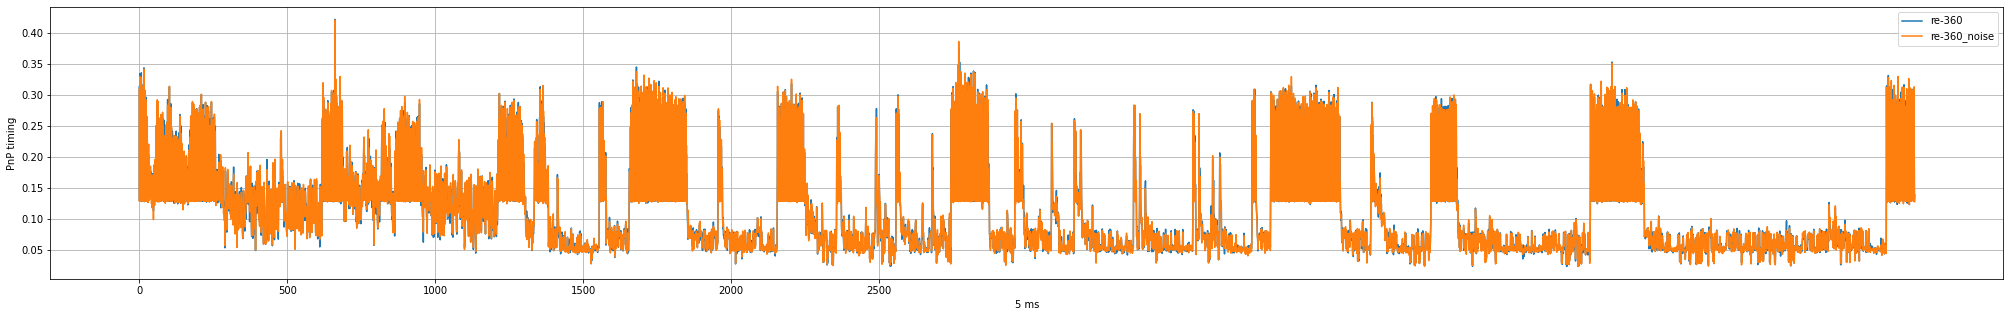

In [101]:
fig = plt.figure(figsize=(35,5))

'''
for i in range (1,100,100):
  #plt.plot(trainX_test[i],label=i)
  plt.plot(re_generated_x[i],label=i)
  plt.plot(generated_x_noise[i],label=i)
'''
#plt.plot(re_generated_x[4000],label='re-google')
#plt.plot(generated_x_noise_each[4000],label='re-google_noise')
plt.plot(re_generated_x[0],label='re-360')
plt.plot(generated_x_noise_each[0],label='re-360_noise')



plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 3000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData20.png')
#plt.show()

Text(0, 0.5, 'PnP timing')

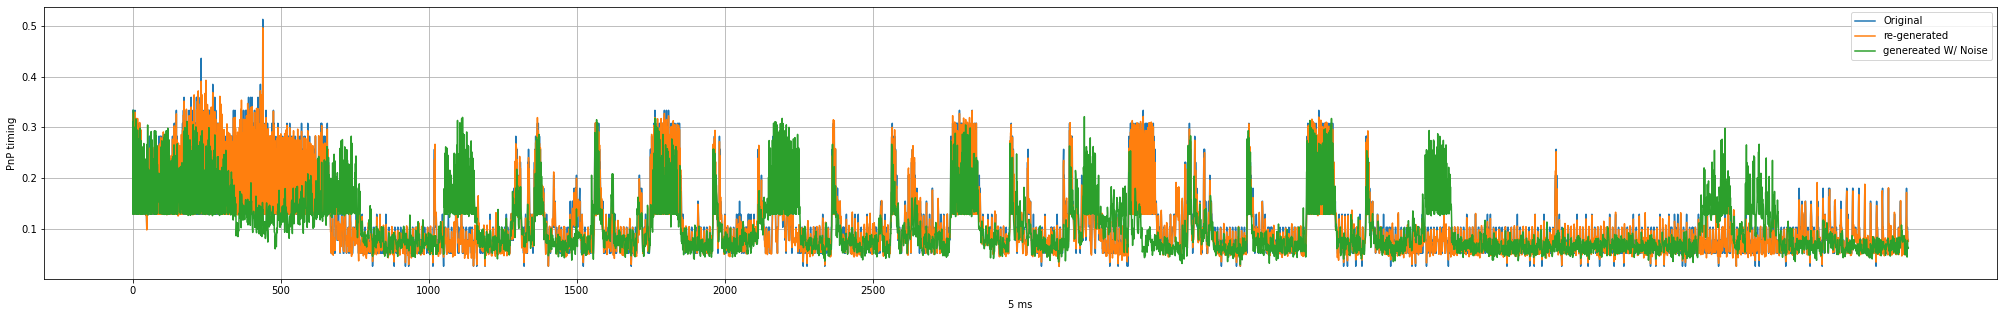

In [102]:
fig = plt.figure(figsize=(35,5))
#plt.plot(trainX_test[0],label='Google')
#plt.plot(trainX_test[2],label='Google')
#plt.plot(trainX_test[1],label='Amazon')

#for i in range (1,2):
#  plt.plot(trainX_test[i],label=i)

#plt.plot(trainX_test[0],label='Amazon')
#plt.plot(trainX_test[100],label='Google')

plt.plot(trainX_test[400],label='Original')
plt.plot(re_generated_x[400],label='re-generated')
plt.plot(generated_x_noise_each[400],label='genereated W/ Noise')

#plt.plot(decision_boundary_new[0],label='Decision Boundary')
#plt.plot(decision_boundary_new[1],label='Decision Boundary')

plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 3000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData20.png')
#plt.show()

In [105]:
diff=prediction_new- prediction 

In [106]:
print(diff)

[ 0 18  2 ... -2 -1  0]


# Only Noise Create

In [107]:
'''
new_z_noise = Lambda(sampling)([Dist_Ex, z_log_var])
#new_z = Lambda(sampling)([z_mean, z_log_var])
#print(new_z)
np.array(new_z_noise)

print(type(new_z_noise))
'''

'\nnew_z_noise = Lambda(sampling)([Dist_Ex, z_log_var])\n#new_z = Lambda(sampling)([z_mean, z_log_var])\n#print(new_z)\nnp.array(new_z_noise)\n\nprint(type(new_z_noise))\n'

In [108]:
'''
only_x_noise = vae.decoder.predict(new_z_noise)
print(only_x_noise.shape)
#print(reconstructed_x[0,:].shape)
'''

'\nonly_x_noise = vae.decoder.predict(new_z_noise)\nprint(only_x_noise.shape)\n#print(reconstructed_x[0,:].shape)\n'

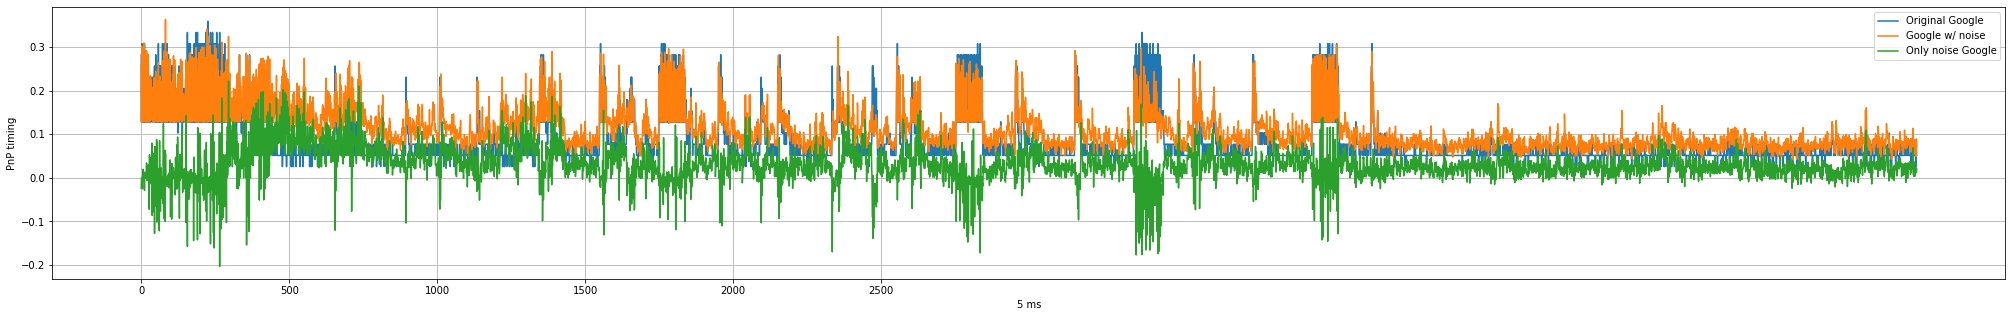

In [109]:

fig = plt.figure(figsize=(35,5))
#plt.plot(trainX_test[0],label='Google')
#plt.plot(trainX_test[2],label='Google')
#plt.plot(trainX_test[1],label='Amazon')

plt.plot(trainX_test[3602],label='Original Google')
plt.plot(generated_x_noise[3602],label='Google w/ noise')
#plt.plot(generated_x_noise[80],label='9gag with noise')
plt.plot(generated_x_noise[3602]-trainX_test[3602],label='Only noise Google')



plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 3000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

fig.savefig('OnlyNoiseGoogle.jpeg')
#plt.show()

In [111]:
#only_x_noise_save = np.squeeze(only_x_noise)
#print(only_x_noise_save.shape)

In [112]:
'''
prediction_only_noise = np.argmax(classification_model.predict(only_x_noise_save), axis=1)

print(prediction_only_noise.shape)
print(prediction_only_noise[0:1000])
'''

'\nprediction_only_noise = np.argmax(classification_model.predict(only_x_noise_save), axis=1)\n\nprint(prediction_only_noise.shape)\nprint(prediction_only_noise[0:1000])\n'

In [113]:
'''
score = classification_model.evaluate(only_x_noise_save, trainY_ca, verbose=0)
print(" loss:", score[0])
print("accuracy:", score[1])
print(score)
#print("accuracy:", score[1])
'''

'\nscore = classification_model.evaluate(only_x_noise_save, trainY_ca, verbose=0)\nprint(" loss:", score[0])\nprint("accuracy:", score[1])\nprint(score)\n#print("accuracy:", score[1])\n'

# Only Noise for Each Website Comparison

In [114]:
new_z_noise_each = Lambda(sampling)([dist_each_noise, z_log_var])
#new_z = Lambda(sampling)([z_mean, z_log_var])
#print(new_z)
np.array(new_z_noise_each)

print(type(new_z_noise_each))

NameError: name 'dist_each_noise' is not defined

In [ ]:
only_x_noise_each = vae.decoder.predict(new_z_noise_each)
print(only_x_noise_each.shape)
#print(reconstructed_x[0,:].shape)


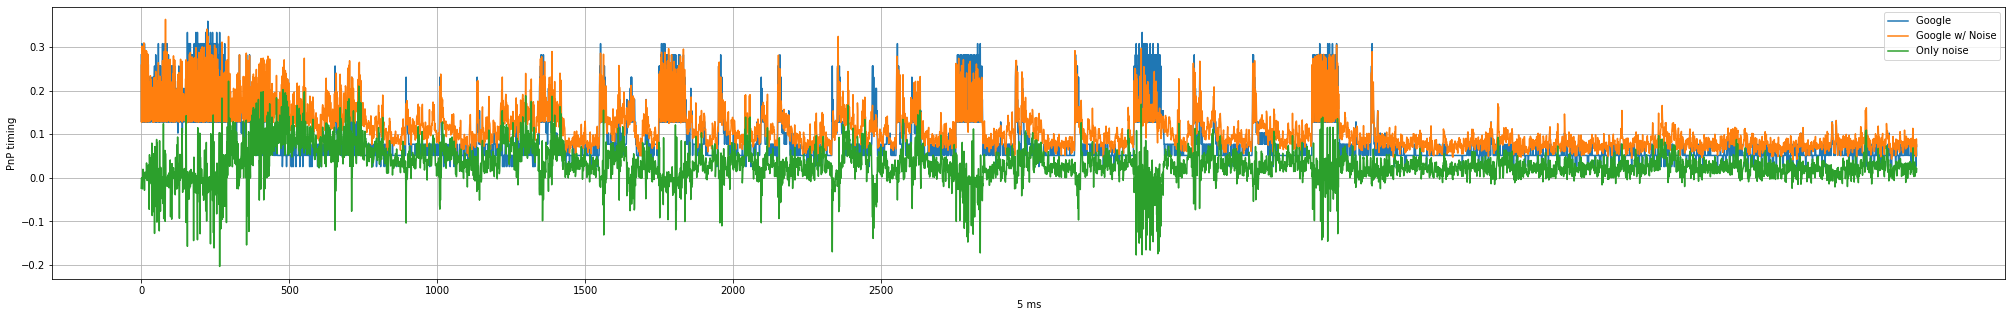

In [116]:

fig = plt.figure(figsize=(35,5))
#plt.plot(trainX_test[0],label='Google')
#plt.plot(trainX_test[2],label='Google')
#plt.plot(trainX_test[1],label='Amazon')

#plt.plot(trainX_test[3800],label='Google')
#plt.plot(generated_x_noise[3800],label='google with noise')
#plt.plot(only_x_noise[3800],label='Only noise')
#plt.plot(only_x_noise_each[3800],label='Only noise each')

#plt.plot(trainX_test[200],label='9gag')
#plt.plot(trainX_test[300],label='9gag')

num = 3602
#plt.plot(generated_x_noise[200],label='9gag with noise')
plt.plot(trainX_test[num],label='Google ')
plt.plot(generated_x_noise[num],label='Google w/ Noise')
plt.plot(generated_x_noise[num]-trainX_test[num],label='Only noise')

ratio=((generated_x_noise[num]-trainX_test[num]) - trainX_test[num])
ratio_minus = np.where(ratio<0,0,ratio)
#plt.plot(ratio_minus,label='ratio')
#print(ratio_minus[0:100])

#plt.plot(only_x_noise_each[0],label='Only noise 9gag')
#plt.plot(only_x_noise_each[400],label='Only noise 2')
#plt.plot(only_x_noise_each[0],label='Only noise 0')
#plt.plot(only_x_noise_each[100],label='Only noise 1')
#plt.plot(only_x_noise_each[700],label='Only noise 3')


plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 3000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('OnlyNoiseGoogle.jpeg')
plt.show()

In [117]:
only_x_noise_each_save = np.squeeze(only_x_noise_each)
print(only_x_noise_each_save.shape)

NameError: name 'only_x_noise_each' is not defined

In [118]:
prediction_only_noise_each = np.argmax(classification_model.predict(only_x_noise_each_save), axis=1)

print(prediction_only_noise_each.shape)
print(prediction_only_noise_each[0:1000])

NameError: name 'only_x_noise_each_save' is not defined

In [119]:
score = classification_model.evaluate(only_x_noise_each_save, trainY_ca, verbose=0)
print(" loss:", score[0])
print("accuracy:", score[1])
print(score)
#print("accuracy:", score[1])

NameError: name 'only_x_noise_each_save' is not defined

# Denormalization


In [120]:
trainX_test.shape

(10000, 6000, 1)

In [121]:
denormalized=trainX_test * (maximum-minimum) + minimum

print(denormalized.shape)

(10000, 6000, 1)


Text(0, 0.5, 'PnP timing')

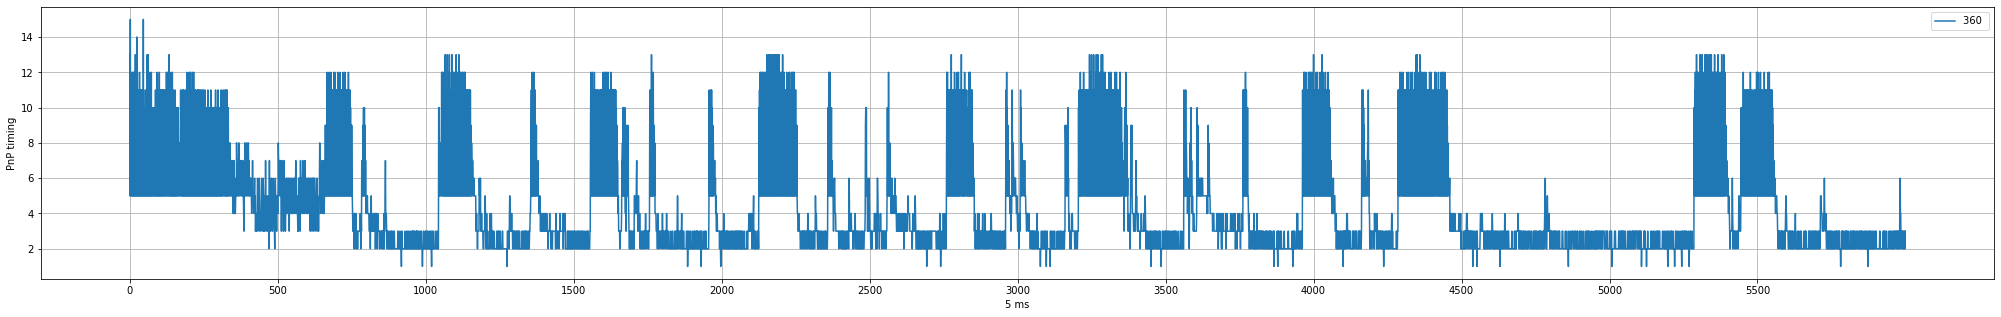

In [122]:

fig = plt.figure(figsize=(35,5))


plt.plot(denormalized[60],label='360 ')



plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 6000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData2_new.png')
#plt.show()

In [123]:
#tf.keras.layers.

In [124]:
#output_temp=tf.keras.layers.UpSampling1D(size=2)(denormalized)

In [125]:
#print(output_temp.shape)

In [126]:
'''
fig = plt.figure(figsize=(35,5))


plt.plot(output_temp[60],label='360 ')
#plt.plot(trainX[60],label='360 ')


plt.legend()
#plt.yticks(np.arange(0, 1, 1))
plt.xticks(np.arange(0, 6000, 500))
plt.grid()
#plt.axhline(linewidth=1, color='r')
plt.xlabel("5 ms")
plt.ylabel("PnP timing")
#figure(figsize=(8, 6), dpi=80)

#fig.savefig('ReconstrucedData2_new.png')
plt.show()
'''

'\nfig = plt.figure(figsize=(35,5))\n\n\nplt.plot(output_temp[60],label=\'360 \')\n#plt.plot(trainX[60],label=\'360 \')\n\n\nplt.legend()\n#plt.yticks(np.arange(0, 1, 1))\nplt.xticks(np.arange(0, 6000, 500))\nplt.grid()\n#plt.axhline(linewidth=1, color=\'r\')\nplt.xlabel("5 ms")\nplt.ylabel("PnP timing")\n#figure(figsize=(8, 6), dpi=80)\n\n#fig.savefig(\'ReconstrucedData2_new.png\')\nplt.show()\n'

In [132]:


with open('reconstructed_x_100_6000_Sep28_100D_NewLayer_FF.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(re_generated_x_save)

#with open('reconstructed_x_100_6000_With_MeanNoise(Sep5)_200D_T.csv', 'w', newline='') as file:
#    mywriter = csv.writer(file, delimiter=',')
#    mywriter.writerows(generated_x_noise_save)
    
    
#with open('reconstructed_x_100_3000_Only_Noise(Aug28)_100D_minus.csv', 'w', newline='') as file:
#    mywriter = csv.writer(file, delimiter=',')
#    mywriter.writerows(only_x_noise_save)
    
    

In [133]:

with open('reconstructed_x_100_6000_With_EachDistance_Sep28_100D_NewLayer_FF.csv', 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(generated_x_noise_each_save)
    
    
#with open('reconstructed_x_100_3000_Only_NoiseEach(Aug30)_100D.csv', 'w', newline='') as file:
#    mywriter = csv.writer(file, delimiter=',')
#    mywriter.writerows(only_x_noise_each_save)